In [2]:
!pip install spectral-cube
!pip install pvextractor 
!pip install aplpy
import matplotlib.pyplot as plt
import numpy as np
from scipy import*
import scipy.ndimage as nd
import matplotlib 
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from scipy import stats
import aplpy
from matplotlib import*
from astropy.convolution import Kernel1D
#from astropy.convolution import Box1DKernela
from astropy import units as u
from astropy.io import fits
from spectral_cube import SpectralCube
from spectral_cube import* # SpectralCube 
from spectral_cube import Projection 
import scipy.ndimage as nd
from pvextractor import extract_pv_slice
from pvextractor import Path
from scipy import optimize

from sympy import nsolve
from scipy.optimize import fsolve 
from scipy.constants import*
from astropy import constants as con
from astropy import units as u
#import matplotlib.mlab as mlab
from astropy.convolution import Kernel1D
from astropy.table import Table
from astropy.wcs import WCS
from astropy.wcs import utils 
from astropy.wcs.utils import pixel_to_skycoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.table import QTable
#from yt.mods import ColorTransferFunction, write_bitmap
#from astropy import yt
import warnings
from astropy.io import fits
import pandas as pd
import seaborn as sns
from astropy.table import vstack, hstack, join

from astropy import units as u
from astropy.visualization.wcsaxes import Quadrangle

# Import DataSci packages and classes >>>>>>>>>>>>>>>>>>

import pandas as pd
import numpy as np

# We'll use this later
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# This is new, it will allow us to interact with
# 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor as gbreg 

In [3]:
#############################################################################################################
## >>>>>>>>>>>>>>>>> Alternative way of uploading and reading files >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#############################################################################################################
from google.colab import drive
drive.mount('/content/gdrive')

filepath = '/content/gdrive/MyDrive/0.Work/RESEARCH_INFO/Research_2021/PilotSurvey_Newfields//Large-sample-outflows-in-CygX-and-ML-methods/'
#filepath = "C:\\Users\\Uber-PC\\Google Drive\\0.Work\\CourseworkStudyMaterial\\Data_Science\\Fall2021\\Erdos_GitHub\\fall-2021\\python prep\\Practice Problems\\" # <<<< this only works with Jupyter Notebook 
           #"C:\Users\Uber-PC\Google Drive\0.Work\CourseworkStudyMaterial\Data_Science\Fall2021\Erdos_GitHub\fall-2021\python prep\Practice Problems\random_walk.csv"

##########################################################################################################################

#kryu_list = QTable.read(filepath + '/data/asu (1).fit') # original Kryukova survey 
#proto = QTable.read(filepath + '/data/cygx_pilot_protostars(Kry).fit')
#wu = QTable.read(filepath + '/data/WuTable.fit')
#outflowsCloud = QTable.read(filepath + '/data/outflowsClouds_output.fit')
#cygX_init_newfields = QTable.read(filepath+'/data/table_newfields_input.fit')
#cygX_init_pilot_1_5kpcA =  QTable.read(filepath + '/data/cygX_pilot_1.5kpc_A_input.fit')
#pilotL = QTable.read(filepath + '/data/cygxPilot_proto.fits')
#cygx_combined_out = pd.read_csv(filepath + '/data/cygx_combined_out.csv').round({'RAJ2000':3, 'DecJ2000':3})

outflows = QTable.read(filepath + '/data/outflowsCloudsJCMT_output.fit')
outflowsF = QTable.read(filepath + '/data/outflowsCloudsJCMT_F.fit')
#proto_0 = QTable.read(filepath + '/data/cygx_class0.fits')
#proto_1 = QTable.read(filepath + '/data/cygx_class1.fits')

# read coordinates tables 
#of_newfields = QTable.read(filepath + '/data/table_newfields_input.fit')
#of_cygrift = QTable.read(filepath + '/data/cygX_pilot_cygrift0.65kpc_outout.fit')
#of_W75 = QTable.read(filepath + '/data/cygX_pilot_W75_outout.fit')
#of_DR21 = QTable.read(filepath + '/data/cygX_pilot_DR21_outout.fit')

cygX0 = SpectralCube.read(filepath + '/data/cygx_cobig_small.fits')
#cygX_pilot = SpectralCube.read(filepath +'/data/cygX_pilot_km.fits')
#cygx21cm = SpectralCube.read(filepath + '/data/cygx.c21_reprj.fits')
co =  SpectralCube.read(filepath + '/data/co_spec_cropped.fits') #cube_cobig_km
co_mom0 = (np.expand_dims(co.moment(order=0, axis=0), axis=0))
#cygx_mom0 = SpectralCube.read(filepath + '/data/cygx_mom0.fits')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


SpectralCube with shape=(171, 2966, 2471):
 n_x:   2471  type_x: RA---TAN  unit_x: deg    range:   304.157172 deg:  311.481944 deg
 n_y:   2966  type_y: DEC--TAN  unit_y: deg    range:    39.256583 deg:   45.458596 deg
 n_s:    171  type_s: VOPT      unit_s: m / s  range:   -30984.751 m / s:   40984.751 m / s

In [ ]:
co

SpectralCube with shape=(98, 2966, 2471):
 n_x:   2471  type_x: RA---TAN  unit_x: deg    range:   304.157172 deg:  311.481944 deg
 n_y:   2966  type_y: DEC--TAN  unit_y: deg    range:    39.256583 deg:   45.458596 deg
 n_s:     98  type_s: VOPT      unit_s: km / s  range:      -11.087 km / s:      29.978 km / s

In [ ]:
%time
outflowsFr = outflowsF.to_pandas().round({'RAJ2000':3, 'DecJ2000':3,	'Vc':2,	'Distance':2,	'Mass':3,	'Momentum':3,	'Energy':3,	'Dynamical Time':3,	'Cloud_Mass':3,	'Cloud_Energy':3,	'Energy_(of/cloud+of)':3,	'L_mech':3,	'Cloud_grav_energy':3,	'Cloud_time_ff':3,	'Cloud_collapse_power':3,	'log_power_ratio':3,	'log_tDyn_tFF_ratio':3})
outflowsFr

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 36.2 µs


,Seq,ID,RAJ2000,DecJ2000,Vc,Distance,Mass,Momentum,Energy,Dynamical Time,Cloud_Mass,Cloud_Energy,Energy_(of/cloud+of),L_mech,Cloud_grav_energy,Cloud_time_ff,Cloud_collapse_power,log_power_ratio,log_tDyn_tFF_ratio
0,1,b'G79.886+2.552',306.127,42.072,6.60,0.65,0.381,1.984,1.510,8.988,9.153,5.683,0.210,0.014,0.099,1.578,0.000,2.430,-1.244
1,4,b'G79.962+2.556',306.196,42.137,5.50,0.65,0.011,0.102,0.097,2.509,3.616,1.515,0.060,0.003,0.015,2.510,0.000,2.800,-2.000
2,3,b'G80.149+2.710',306.154,42.376,6.00,0.65,0.191,0.634,0.229,5.672,43.681,3.538,0.061,0.003,2.244,0.722,0.003,0.113,-1.105
3,2,b'G80.158+2.727',306.144,42.394,6.00,0.65,0.229,0.899,0.509,5.063,27.060,4.307,0.106,0.008,0.861,0.918,0.001,1.030,-1.258
4,27,b'G80.815+0.661',308.918,41.709,-3.00,1.50,0.149,0.388,0.138,30.027,6.348,0.991,0.122,0.000,0.047,1.894,0.000,1.264,-0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,33,b'0',309.856,41.328,-1.38,1.50,11.935,27.879,6.831,19.776,1091.152,108.336,0.059,0.029,1400.140,0.144,8.021,-2.448,0.136
80,34,b'0',309.873,41.368,-1.12,1.50,0.980,2.654,1.037,21.621,468.391,42.646,0.024,0.004,257.999,0.221,0.968,-2.387,-0.009
81,36,b'0',309.880,41.364,-2.50,1.50,5.501,10.693,2.514,31.464,631.369,63.063,0.038,0.007,468.778,0.190,2.043,-2.490,0.219
82,32,b'0',309.882,41.337,-2.25,1.50,2.000,7.427,2.841,5.244,947.514,110.024,0.025,0.045,1055.777,0.155,5.636,-2.099,-0.471


In [ ]:
outflowsF

Seq,ID,RAJ2000,DecJ2000,Vc,Distance,Mass,Momentum,Energy,Dynamical Time,Cloud_Mass,Cloud_Energy,Energy_(of/cloud+of),L_mech,Cloud_grav_energy,Cloud_time_ff,Cloud_collapse_power,log_power_ratio,log_tDyn_tFF_ratio
,,deg,deg,km / s,kpc,solMass,km solMass / s,1e+44 erg,10 kyr,solMass,1e+44 erg,,solLum,1e+44 erg,Myr,solLum,,
int64,bytes13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,G79.886+2.552,306.12695,42.07195,6.6,0.65,0.3806047309875691,1.983723446299846,1.5099774793414629,8.988472395348822,9.153315002797171,5.683432132383429,0.20991123275953538,0.013906206842583714,0.09852755778022891,1.5776393549456176,5.1698041447227065e-05,2.429734594455313,-1.2443218424175055
4,G79.962+2.556,306.19627708350004,42.137068055,5.5,0.65,0.011387653981149732,0.10183117215852745,0.09702632374351362,2.5092913412849533,3.616023057955317,1.5151680094080864,0.060182771858428255,0.0032008298787727265,0.015376705027723673,2.5100440319365407,5.0711452161884e-06,2.80015654531038,-2.0001302520651474
3,G80.149+2.710,306.15387495,42.3759486,6.0,0.65,0.19121804486600497,0.6339892666602237,0.22881300901910812,5.672218136218539,43.680865878239274,3.5382742363078656,0.06074003443985745,0.0033392727391642375,2.2437960467691855,0.7221897434470028,0.0025719123629126288,0.1133957259739244,-1.1048983921377453
2,G80.158+2.727,306.144,42.394149999999996,6.0,0.65,0.2291354729486776,0.8994266383792182,0.5090645443484406,5.06302169829402,27.059939220547676,4.306699984976175,0.10570793925836612,0.008323139338502325,0.8611018745497748,0.9175580024265129,0.0007768642049665668,1.0299420540375248,-1.2582237386218835
27,G80.815+0.661,308.9185,41.709,-3.0,1.5,0.14894788829212735,0.38795019230909394,0.13807706815198442,30.027240242073944,6.347718231379986,0.9908239194400907,0.12231105266946415,0.00038065386345587164,0.04738448690836195,1.8944716705253872,2.070485392325379e-05,1.2644580712166682,-0.7999726966354874
9,G80.832+0.570,309.03432291499996,41.6708321,11.5,1.3,2.4501178407978226,5.719880527222093,1.5467154276523727,9.07554901794966,675.3616638025269,59.38005752826839,0.02538646563098605,0.014107875369897034,536.3814012817493,0.18366598542341017,2.417514463521792,-2.2339074666426595,-0.3061558264811448
26,G80.862+0.385,309.25425,41.5805,-1.4,1.5,6.073208838363632,28.013223100538582,14.86759547217229,11.70781415611552,467.77174841053784,70.12759141673374,0.17492279288243884,0.10512088772523114,257.3172362861453,0.22068862121210867,0.96519050446724,-0.9629240209110785,-0.27530412130606563
31,G80.916+0.331,309.3555,41.593999999999994,-1.3,1.5,0.7206042623756527,2.4214013812180584,1.0060424006144808,15.610418874820688,62.18381137365941,9.208798714315147,0.09848830630797448,0.005334894457534882,4.547320614127683,0.6052827080209713,0.006219012254045659,-0.06659558054073693,-0.5885437103214302


In [ ]:
proto
flat_spectrum_max = 0.3
flat_spectrum_min = -0.3

In [ ]:
kryu_list_df = kryu_list.to_pandas()
kry_list_df_flat = kryu_list_df[(kryu_list_df.alpha < 0.3) & (kryu_list_df.alpha >= -0.3)].reset_index()

In [ ]:
%time
kry_list_df_flat

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


NameError: ignored

In [ ]:
cygx_combined_out = pd.read_csv(filepath + '/data/cygx_combined_out.csv').round({'RAJ2000':3, 'DecJ2000':3})
cygx_combined_out

NameError: ignored

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -1.833e+01 [aplpy.core]
INFO: Auto-setting vmax to  8.357e+01 [aplpy.core]
INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to  2.651e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.160e+01 [aplpy.core]
k-value= 0 

nan pixel
k-value= 1 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 2 

non nan pixel
k-value= 3 

non nan pixel
k-value= 4 

non nan pixel
k-value= 5 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 6 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 7 

nan pixel
k-value= 8 

non nan pixel
k-value= 9 

non nan pixel
k-value= 10 

non nan pixel
k-value= 11 

non nan pixel
k-value= 12 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 13 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 14 

nan pixel
k-value= 15 

non nan pixel
k-value= 16 

non nan pixel
k-value= 17 

non nan pixel
k-value= 18 

non nan pixel
k-value= 19 

non nan pixel
k-value= 20 

non nan pixel
k-value= 21 

nan pixel
k-value= 22 

non nan pixel
k-value= 23 

non nan pixel
k-value= 24 

non nan pixel
k-value= 25 

non nan pixel
k-value= 26 

non nan pixel
k-value= 27 

non nan pixel
k-value= 28 

nan pixel
k-value= 29 

non nan pixel
k-value= 30 

non nan pixel
k-value= 31 

non nan pixel
k-value= 32 

non nan pixel
k-value= 33 

non nan pixel
k-value= 34 

non nan pixel
k-value= 35 

nan pixel
k-value= 36 

non nan pixel
k-value= 37 

non nan pixel
k-value= 38 

non nan pixel
k-value= 39 

non nan pixel
k-value= 40 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 41 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 42 

nan pixel
k-value= 43 

non nan pixel
k-value= 44 

non nan pixel
k-value= 45 

non nan pixel
k-value= 46 

non nan pixel
k-value= 47 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


k-value= 48 

non nan pixel


<string>:6: RuntimeWarning: Mean of empty slice


INFO: Auto-setting resolution to 245.53 dpi [aplpy.core]
INFO: Auto-setting resolution to 97.1026 dpi [aplpy.core]
0
co mean values: [        nan         nan  1.25773716  6.87276793  0.61674994         nan
         nan         nan  1.8567822   3.5519011   1.99477518  1.03546023
         nan         nan         nan  3.22558141  1.28278172  1.12447071
  0.41341394  0.65832579  0.20712158         nan  6.13979435  1.99986529
  0.52302212  2.73794746  1.4275856   1.65219831         nan  1.4632504
  5.88256645  9.21749115  5.50690699  2.58312559  0.66684657         nan
  3.95316958  8.8983593  17.98693275  2.55068898         nan         nan
         nan  1.2453469   1.43647063  7.58489227  4.22470856         nan
         nan] K km / s
21-cm mean values: [18.29869461 23.0622654  14.92785168 12.60480118 10.2796917   9.58103848
 10.98877811 22.61241913 29.54439735 19.64862633 15.06107044 12.33699703
  9.85798359  8.81494808 24.16682816 23.00341415 15.65573692 13.18206596
 12.46931267 11.3182582

,12CO(K km/s),21cm(K),proto_flat_number
38,17.986933,25.364428,57.0
22,6.139794,17.214018,39.0
14,NaN,24.166828,33.0
30,5.882566,21.594070,25.0
31,9.217491,21.756325,24.0
23,1.999865,18.295208,23.0
37,8.898359,18.824352,22.0
16,1.282782,15.655737,22.0
28,NaN,17.082020,21.0
21,NaN,19.031555,20.0


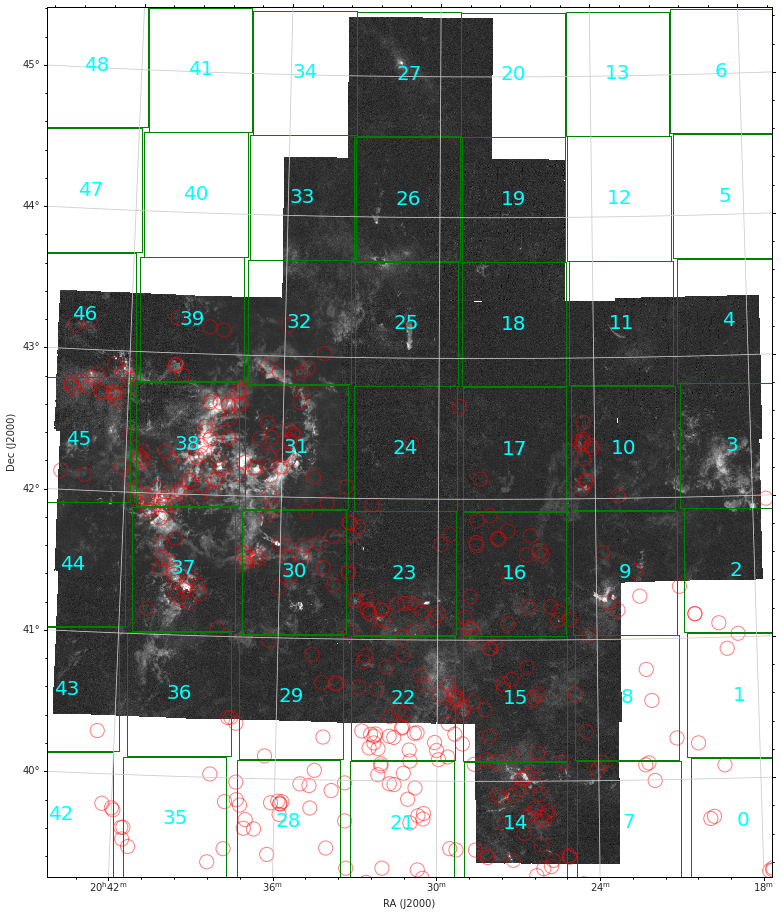

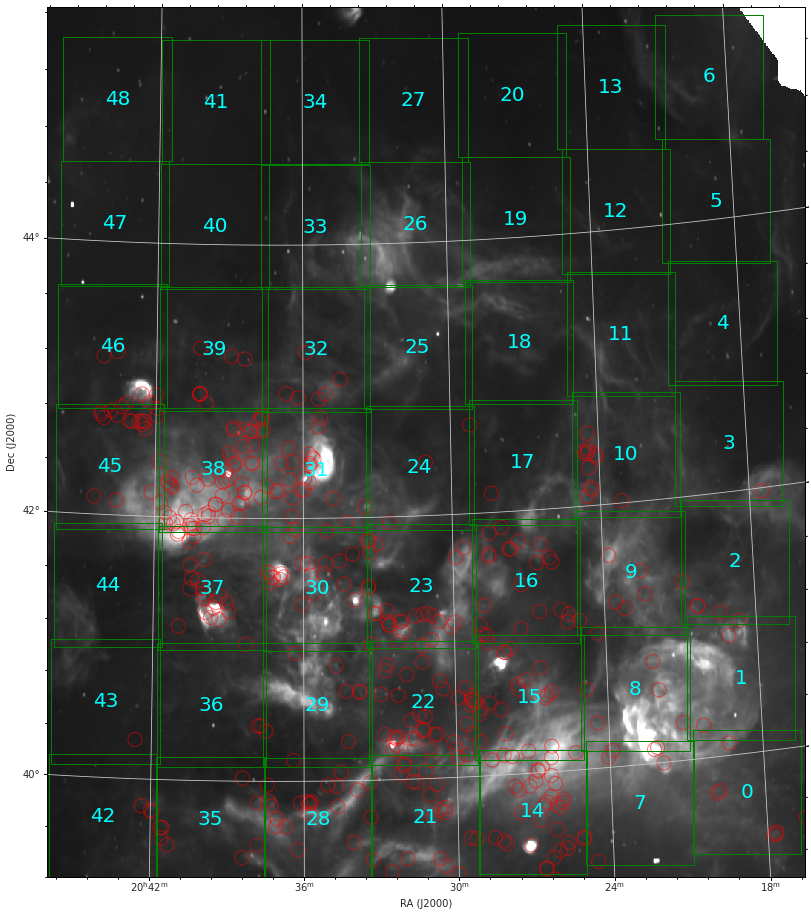

In [ ]:
####################################################################################################################################################################################################################################################
###  >>>>> ML REGRESSION MODEL OF protostar number DENSITY ON MEAN CO and 21cm 
# >>> INTENSITY AND MEAN 21-CM RADIO CONTINUUM INTENSITY PER UNIT AREA GRID <<<<<<
# >>>>>>>>>>>>>>>> TEST CODES <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
from astropy.nddata import Cutout2D
from numpy import meshgrid
## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# This is new, it will allow us to interact with 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D
## This sets the plot style to have a grid on a white background
sns.set_style("whitegrid")
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore', category=UserWarning, append=True)

proto_flat = kry_list_df_flat.round({'RAJ2000':3, 'DecJ2000':3})
N = 7
xmin = co.world_extrema[0][0] # 304.157172*u.deg
xmax = co.world_extrema[0][1] #311.481944*u.deg
ymin = co.world_extrema[1][0] #39.256583*u.deg 
ymax = co.world_extrema[1][1] #45.458596*u.deg
dx = np.abs(xmax - xmin) / N
dy = np.abs(ymax - ymin) / N

co_mean = np.zeros(N**2) *u.K * u.km / u.s
c21_mean = np.zeros(N**2) * u.K
n_flat = np.zeros(N**2)

counter = 0
k = 0
w0 = co.shape[2]/N # this is because cubes have vel, y/Dec, x/RA data in this order
h0 = co.shape[1]/N

w0_21cm = cygx21cm.shape[2]/N # this is because cubes have vel, y/Dec, x/RA data in this order
h0_21cm = cygx21cm.shape[1]/N

#co_mom0 = (np.expand_dims(co.moment(order=0, axis=0), axis=0))

f = aplpy.FITSFigure(co_mom0.hdu,figsize=(18, 16))
f.show_grayscale()

g = aplpy.FITSFigure(cygx21cm.hdu,figsize=(18, 16))
g.show_grayscale()

# >>>>>> this part for displaying proto_flat and sf regions >>>>>>>>>>>>>>>>>>
cdelt = utils.proj_plane_pixel_scales(co.wcs)
dv = cdelt[2]*1e-6*u.km/u.s
vlo1 = - 8.0*u.km/u.s # low negative velocity range: -8 =< v < 0
vhi1 = 1*u.km/u.s
# high positive velocity range: v > 8
vlo3 = 7*u.km/u.s + dv
vhi3 = 30*u.km/u.s
# >>>>>>>>>>>>>>>> plot proto_flat >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
for z in range(0,len(proto_flat)):
        f.show_markers(proto_flat.loc[z]['RAJ2000'], proto_flat.loc[z]['DEJ2000'], 
                       edgecolor='red', facecolor='none',marker='o', s=200, alpha=0.5)
        g.show_markers(proto_flat.loc[z]['RAJ2000'], proto_flat.loc[z]['DEJ2000'], 
                       edgecolor='red', facecolor='none',marker='o', s=200, alpha=0.5)
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

for i in range(N):
    
    for j in range(N):
        
        # TASK1: this extracts pixels based on 12co cube coordinates and slices segments from 12co map 

        lon_range = [xmin+i*dx, xmin+(i+1)*dx]
        lat_range = [ymin+j*dy, ymin+(j+1)*dy]
        #print(lon_range[0], lon_range[1], lat_range[0], lat_range[1])
        
        xw = (lon_range[0]+lon_range[1])/2
        yw = (lat_range[0]+lat_range[1])/2
        
        x0, y0, _ = co.wcs.wcs_world2pix(xw, yw, 0, 0)
        f.show_rectangles(x0, y0, w0, h0, angle=0, layer=False, zorder=None,
                          coords_frame='pixel', edgecolor='green')
        f.add_label(xw.value, yw.value, str(k), color='cyan', size=20)
        x0_21cm, y0_21cm, _ = cygx21cm.wcs.wcs_world2pix(xw, yw, 0, 0)
        g.show_rectangles(x0_21cm, y0_21cm, w0_21cm, h0_21cm, angle=0, layer=False, zorder=None,
                          coords_frame='pixel', edgecolor='green')
        g.add_label(xw.value, yw.value, str(k), color='cyan', size=20)
        # Create a sub_cube cutout with these coordinates
        position = (x0, y0)
        size = (w0, h0)     # pixels

        if i < N-1:
          lon_range = [xmin+i*dx, xmin+(i+1)*dx]
        elif i==N-1:
          lon_range = [xmin+i*1.005*dx, xmin+(i+1)*0.95*dx]

        print('k-value=',k,'\n')

        try:
            sub_cube_co = co.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
            subcube_mom = (np.expand_dims(sub_cube_co.moment(order=0, axis=0), axis=0)) * u.K
            #subcube_mom =(sub_cube_co.sum(axis=0)*dv)*u.K#.moment(order=0, axis=0) # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< HERE HERE HERE <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ||||||||||||||||||||||   IndexError happening here but WHY ????????????????
            #print('non nan pixel')
            #print(subcube_mom) # <<<<<<<< should not be all NaN for k=22
            co_mean[k] = np.nanmean(subcube_mom[~np.isnan(subcube_mom)])
        except IndexError:
             #print('nan pixel')
          
             co_mean[k] = np.nan
                
        # TASK2: this extracts pixels based on 21cm coordinates and slices segments from 21cm map  
        sub_cube_c21 = cygx21cm.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
        c21_mean[k] = (sub_cube_c21.mean(axis=(1,2)))[0] * u.K 


        # TASK3: count proto_flat in these 25 coordinate segments >>> use a boolean statement if coordinates from output_jcmt list belongs to each segment, counter[k]=counter[k]+1 >> NOTE: does not count for OFs at .65 kpc
        for z in range(0,len(proto_flat)):
            s1 = (proto_flat.loc[z]['RAJ2000']*u.deg > xmin+(i*dx)) & (proto_flat.loc[z]['RAJ2000']*u.deg < xmin+((i+1)*dx))
            s2 = (proto_flat.loc[z]['DEJ2000']*u.deg > ymin+(j*dy)) & (proto_flat.loc[z]['DEJ2000']*u.deg < ymin+((j+1)*dy))
            #s3 = (outflows.loc[z]['Distance'] != 0.65)
            if (s1 and s2) == True: # and s3
            # selected outflow coordinates fall in the range of fieldN.fits under consideration
                n_flat[k] +=1
            else:
                pass
            

        k +=1
        #if k==23:
          #break


f.save('co_grids.pdf')
g.save('21cm_grids.pdf')    
print(counter)
print('co mean values:',co_mean)
print('21-cm mean values:',c21_mean)
print('outflow numbers in segments:', n_flat, '\n Total number of proto_flat=', n_flat.sum())

proto_co = pd.DataFrame({'12CO(K km/s)':co_mean, '21cm(K)': c21_mean, 'proto_flat_number':n_flat})
proto_co.to_csv(filepath + '/data/co+21cm_flat49.csv')
proto_co.sort_values('proto_flat_number', ascending=False)

In [ ]:
#############################################################################################################################################################
################################################                                          ###################################################################
################################################  POWER IN CLOUD TURBULENCE ENERGY        ###################################################################
################################################  small scale clumps around outflows      ###################################################################
################################################                                          ###################################################################
#############################################################################################################################################################
# CODE DEVELOPMENT: CLOUD MASS CALCULATION 
# 1. create a subcube around the center RA, Dec of a outflow with a fixed size spatial pixels and 
# [min blue velocity, max red velocity]
# 2. produce a contour showing the outflow and a circle showing the cloud of size ~ 5*beamsize ~ 75"
# 3. calculate energy of a smaller subcube representing the cloud and vaxis range in mu +/- 2*sigma.
# Mu and sigma are estimated as before, using line center and miinized energy 
from astropy.wcs import utils
from astropy import units as u
import warnings
import warnings
warnings.filterwarnings("ignore")
from matplotlib.patches import Circle
import sys 
import os
sys.path.append(filepath + '/data')
from cygFn import f, length, Jnu, G, Quad
################################################################################################################    

# Read data

#cube = SpectralCube.read('field13.fits') # <<<<<<---------- Change filename ******
#cygX0 = SpectralCube.read('cygx_cobig_small.fits')
cube = cygX0.with_spectral_unit(u.km/u.s)

cygX_init = outflowsF # QTable.read('table_newfields_input.fit') ### CHANGE FIELD NAME ###
#cygX_init = QTable.read('nf_input_test.fit') 

warnings.filterwarnings('ignore', category=UserWarning, append=True)


## CREATE EMPTY TABLE FOR OUTPUT MASS, MOMENTUM, ENERGY 
t = QTable(names=('Seq','ID','RAJ2000','DecJ2000','Outflow_Lum_mech','Cloud_Mass','Cloud_En_turb','Cloud_Lum_turb'),
           dtype=('i8','U10','f8','f8','f8','f8','f8','f8'))  
for z in range(0, len(cygX_init)):
    s1 = (cygX_init['RAJ2000'][z] > (cube.world_extrema[0])[0]) & (cygX_init['RAJ2000'][z] < (cube.world_extrema[0])[1])
    s2 = (cygX_init['DecJ2000'][z] > (cube.world_extrema[1])[0]) & (cygX_init['DecJ2000'][z] < (cube.world_extrema[1])[1])
    # imposing this condition to make sure the codes do not attmpt to compute values 
    #for coordinats ouside of sub field range
    if (s1 and s2) == True: # selected outflow coordinates fall in the range of fieldN.fits under consideration 
        print("coordinates in range for outflow no.",z) #perform the task 
    

        #RA = (ra_b.value+ra_r.value)/2
        #Dec = (dec_b.value+dec_r.value)/2
        RA = cygX_init[z]['RAJ2000'].value 
        Dec = cygX_init[z]['DecJ2000'].value
    
        distance = (cygX_init[z]['Distance']).to(u.pc).value

        ##### Spectral boundary includes 15 km/s on each side of the vel range 
        dv = (cube.spectral_axis[1]-cube.spectral_axis[0]).value
        vlo =-25*u.km/u.s
        vhi = 25*u.km/u.s

        box = 15

        x0, y0, _ = cube.wcs.wcs_world2pix(RA, Dec, 0, 0)
        print('checkpoint0',z+1)
        #print(x0)
        #print(y0)
        slab = cube.spectral_slab(vlo, vhi) 
        subcube = slab[:, int(y0-box):int(y0+box), int(x0-box):int(x0+box)]
         
        #############################################################################################
        #########################    Cloud energy calc.    ##########################################
        #############################################################################################
        
        # create a new subcube for Cloud of the size of the circle and vbmin, vrmax
        
        # pixel size in deg 
        
        ang_width = 1 * 14.6 * u.arcsec
        cdelt = utils.proj_plane_pixel_scales(cube.wcs)
        width = (ang_width*0.5 / (cdelt[0] * u.deg)).to(u.dimensionless_unscaled).value
        
        # 4 beamsize in pix 
        boxC = ((8 * cdelt[0]*u.deg)/(cdelt[0]*u.deg)).to(u.dimensionless_unscaled).value
        slabC = cube.spectral_slab(vlo, vhi) 
        cloud = slabC[:, int(y0-boxC):int(y0+boxC), int(x0-boxC):int(x0+boxC)]

        cloudshape = cloud[0].shape

        vaxis=cloud.spectral_axis.value
        
        v0array = np.zeros(cloudshape)
        sig0array = np.zeros(cloudshape)
        amparray= np.zeros(cloudshape)

        # Now calculate the opacitypoptblue, pcov = optimize.curve_fit(Quad, vaxis[EndFitBlue:StartFitBlue],(blue12 / blue13)[EndFitBlue:StartFitBlue],p0 = (c0, v0, c2),maxfev = 1000000)
        Tpeak = cloud.max(axis=0) * u.K   # <<<<--- change to u.K for big cube --->>>>
        nu = 330.588 * u.GHz
        Tbg = 2.73 * u.K
        Aul = 6.038e-7 / u.s
        B0 = 54891.42 * u.MHz
        E3 = 30 * u.K
        Tex = ((con.h * nu / con.k_B)
                / np.log(1 + con.h * nu
                        / (con.k_B * (Tpeak + Jnu(Tbg, nu=nu)))))
        Tex = Tex.to(u.K)

        co13cloud = np.zeros_like(cloud)

        DeltaNu = np.abs((vaxis[1] - vaxis[0]) * u.km / u.s/ con.c * nu).to(u.Hz)
        DeltaV = np.abs((vaxis[1] - vaxis[0]) * u.km/u.s)

        log_co13cloud = 2.074571 * np.log10(cloud) - 2.699635
        co13cloud=10**log_co13cloud

        tau13dnu = co13cloud * DeltaV 

        N13co = (8 * np.pi * nu**3 / con.c**3 / Aul
                    /(np.exp(con.h * nu / con.k_B / Tex) - 1) * tau13dnu
                    )
        Qrot = con.k_B * Tex / (con.h * B0) * np.exp(con.h * B0
                                                             / (3 * con.k_B * Tex))
        # Calculate column density of material
        N13coTot = Qrot / 7 * np.exp(E3 / Tex) * N13co # g_u=7 for u=3, l=2 transition Qrot
        # Assume a column density ratio
        NH2 = (7.5e5 * N13coTot).to(u.cm**(-2))

        apix = np.prod(
            np.abs(np.array([width, 1]) 
                    * (subcube.wcs.celestial.wcs.get_cdelt())
                / 180 * np.pi * distance)) * u.pc**2
        Mass = (NH2 * con.m_n * 2.32 * apix).to(u.solMass)
        print('Mass dimensions:',Mass.shape)

      
        # 2. estimate sigma12 and vcenter --------------->>>>>>>>>>>>>>>>>>  
   
        #### sigma calculation 
        cloudshape = cloud[0].shape # spatial shape
        Tpeak=np.ones(cloudshape)
        vpeak=np.ones(cloudshape)
        sigma=np.ones(cloudshape)
        vaxis=cloud.spectral_axis.value
        for i in range(cloudshape[0]):
            for j in range(cloudshape[1]):
                spec=cloud[:,i,j].value # removes unit=K
                Tpeak[i,j]=np.nanmax(spec)
                #print('Tpeak=',Tpeak[i,j])
                #print('sigma for this pixel before check',sigma[i,j])
                if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel
                    print('NaN pixel')
                    #print('Tpeak=',Tpeak[i,j])
                    #rint('spec:',spec)
                    #sigma[i,j] = np.nanmean(sigma[:i,j])
                    #vpeak[i,j] = np.nanmean(vpeak[:i,j])
                    pass
                else:
                    #print('non NaN pixel')         
                
                    vpeak[i,j]=vaxis[np.nanargmax(spec)]
                    hf=Tpeak[i,j]/2

                    vraw=vaxis[spec>=hf] # vraw may be completely to the left or right on vpeak value, ideally on both sides

                    vp=vraw[vraw>=vpeak[i,j]]

                    vn=vraw[vraw<=vpeak[i,j]]

                    vp_max=np.max(vp)
                    vn_max=np.min(vn)
                    if np.abs(vp_max-vpeak[i,j]) == 0:  # This condition makes sure sigma is not zero
                        HWHM = np.abs(vn_max-vpeak[i,j])
                    elif np.abs(vn_max-vpeak[i,j]) == 0:
                        HWHM = np.abs(vp_max-vpeak[i,j])
                    else:
                        HWHM=np.minimum(np.abs(vp_max-vpeak[i,j]),np.abs(vn_max-vpeak[i,j]))
                    sigma[i,j]=HWHM/((2*np.log(2))**0.5)
                #print('sigma for this pixel after check', sigma[i,j])
                #print('--------------------------------------')

        #print('checkpoint: sigma \n', sigma)
        #############  line center estimation: MINIMIZATION OF ENERGY ######################
        #### energy of the entire spectrum under the spectrum profile for each pixel wrt Tpeak velocity
        #### This finds the line center at which E=min for each position
        
       
        N=int(vaxis.shape[0]/2) #this integer must be less than spectral pixel number
        Energy = np.zeros(N)
        
        # this number must be less than spectral pixel number
        vcen = np.zeros(shape=(N, cloudshape[0],cloudshape[1])) 
        vcentr = np.zeros(cloudshape) # dim should be equal to the number of spatial pixels along the mass pv slice

        for i in range(cloudshape[0]):
            for j in range(cloudshape[1]):
                l = vpeak[i,j]-5*sigma[i,j] # <<<<<<<<<<<<<<<<<<<<<<<<  SHOULD IT BE 5 ??? YES THIS RANGE IS JUST USED TO FIND E_MIN AT WHAT VEL
                u = vpeak[i,j]+5*sigma[i,j]
                vcen[:,i,j] = np.linspace(l,u,N) # half of spectral pixels     

        for i in range(cloudshape[0]):
            for j in range(cloudshape[1]):
                spec = cloud[:,i,j].value
                
                if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel
                    #print('nan-pixel encountered in line center calc')
                    vpeak[i,j] = np.nanmean(vpeak[:i,j])
                    vcentr[i,j] = np.nanmean(vcentr[:i,j])
                else:
                    #print('non nan pixel')  

                    vpeak[i,j]=vaxis[np.nanargmax(spec)]
                    for k in range(N):
                        voff = vaxis-vcen[k,i,j]#*u.km**2/u.s**2
                        Energy[k] = (np.nansum(Mass[:,i,j].value*voff**2))#.to(u.erg)#SUM OVER 1445 VEL VALUES  <<<<<<<<<<<<<<<<<<< CHECK THIS WHY SUM OVER K AND THE 2 LINES BELOW
                        voff_argmin = voff[np.nanargmin(Energy)]
                        vcentr[i,j] = vcen[:,i,j][np.nanargmin(Energy)]#*u.km/u.s#finds vcen_value(among 1e3 vcen values)at which E=min <<<< SHOULD THIS BE OUT OF K LOOP??
        
        from astropy import units as u
        massvecC = np.zeros(cloudshape) * u.solMass
        energyC = np.zeros(cloudshape) * u.solMass * (u.km/u.s)**2
        turbLum = np.zeros(cloudshape) * u.solLum

        #lumC = np.zeros(cloudshape)
        L = (( cloud[z].shape[0] * (cdelt[0] * u.deg)).to(u.rad)/(1*u.rad)).to(u.dimensionless_unscaled).value * cygX_init[z]['Distance']           #<<<<<<<<<<< size of cloud <<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        for i in range(cloudshape[0]):
            for j in range(cloudshape[1]):
                spec = cloud[:,i,j].value
                if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel
                    #print('NaN pixel')
                    
                    massvecC[i,j] = 0
                    energyC[i,j] = 0
                else:                   
                    voff = (vcentr[i,j]-vaxis)*u.km/u.s
                    idxC = (vaxis > vcentr[i,j] - 2*sigma[i,j]) & (vaxis < vcentr[i,j] + 2*sigma[i,j])
                    massvecC[i,j] = np.nansum(Mass[idxC, i,j])
                    energyC[i,j] = 0.5 * np.nansum(Mass[idxC, i,j] * voff[idxC]**2)
                    turbLum[i,j] = (np.nansum(Mass[idxC, i,j] * np.abs(voff[idxC])**3)/L).to(u.solLum)
        
        mass_cloud = massvecC.sum()
        energy_cloud = energyC.sum().to(u.erg)/(1e44*u.erg) # units of 1e44*u.erg *u.solMass*u.km**2/u.s**2)
        lum_cloud = turbLum.sum()#.to(u.solLum)

        
        print('Cloud mass', mass_cloud)
        print('Cloud energy',energy_cloud,'1e44*u.erg')
        t.add_row([z+1,cygX_init[z]['ID'], round(RA,4), round(Dec,4), cygX_init[z]['L_mech'],round(mass_cloud.value,3), 
                   round(energy_cloud.value,3),  round(lum_cloud.value,3)])
    else:
        pass
    
t['RAJ2000'].unit = u.deg
t['DecJ2000'].unit = u.deg
t['Outflow_Lum_mech'].unit = u.solLum 
t['Cloud_Mass'].unit = u.solMass
t['Cloud_En_turb'].unit = 1e44*u.erg
t['Cloud_Lum_turb'].unit = 1*u.solLum
t.write(filepath + '/data/outflowsClouds_Energy_turb2.fit',overwrite=True) # <<<<<<---------- Change filename ******
t

coordinates in range for outflow no. 0
checkpoint0 1
Mass dimensions: (119, 16, 16)
Cloud mass 8.316536554353661 solMass
Cloud energy 3.9305132804683502 1e44*u.erg
coordinates in range for outflow no. 1
checkpoint0 2
Mass dimensions: (119, 16, 16)
Cloud mass 2.9644683527712914 solMass
Cloud energy 1.004642490723874 1e44*u.erg
coordinates in range for outflow no. 2
checkpoint0 3
Mass dimensions: (119, 16, 16)
Cloud mass 40.2693136529997 solMass
Cloud energy 2.4244515023612045 1e44*u.erg
coordinates in range for outflow no. 3
checkpoint0 4
Mass dimensions: (119, 16, 16)
Cloud mass 23.715358211193234 solMass
Cloud energy 2.7381500491623076 1e44*u.erg
coordinates in range for outflow no. 4
checkpoint0 5
Mass dimensions: (119, 16, 16)
Cloud mass 5.427854112349451 solMass
Cloud energy 0.6467334867225745 1e44*u.erg
coordinates in range for outflow no. 5
checkpoint0 6
Mass dimensions: (119, 16, 16)
Cloud mass 688.0488525813125 solMass
Cloud energy 53.25020894353014 1e44*u.erg
coordinates in ra

Seq,ID,RAJ2000,DecJ2000,Outflow_Lum_mech,Cloud_Mass,Cloud_En_turb,Cloud_Lum_turb
,,deg,deg,solLum,solMass,1e+44 erg,solLum
int64,str13,float64,float64,float64,float64,float64,float64
1,G79.886+2.552,306.127,42.072,0.013906206842583714,8.317,3.931,0.072
2,G79.962+2.556,306.1963,42.1371,0.0032008298787727265,2.964,1.005,0.015
3,G80.149+2.710,306.1539,42.3759,0.0033392727391642375,40.269,2.424,0.02
4,G80.158+2.727,306.144,42.3941,0.008323139338502325,23.715,2.738,0.028
5,G80.815+0.661,308.9185,41.709,0.00038065386345587164,5.428,0.647,0.002
6,G80.832+0.570,309.0343,41.6708,0.014107875369897034,688.049,53.25,0.165
7,G80.862+0.385,309.2542,41.5805,0.10512088772523114,433.3,50.37,0.164
8,G80.916+0.331,309.3555,41.594,0.005334894457534882,57.258,9.919,0.047


average power ratio =  -0.5824555413670855


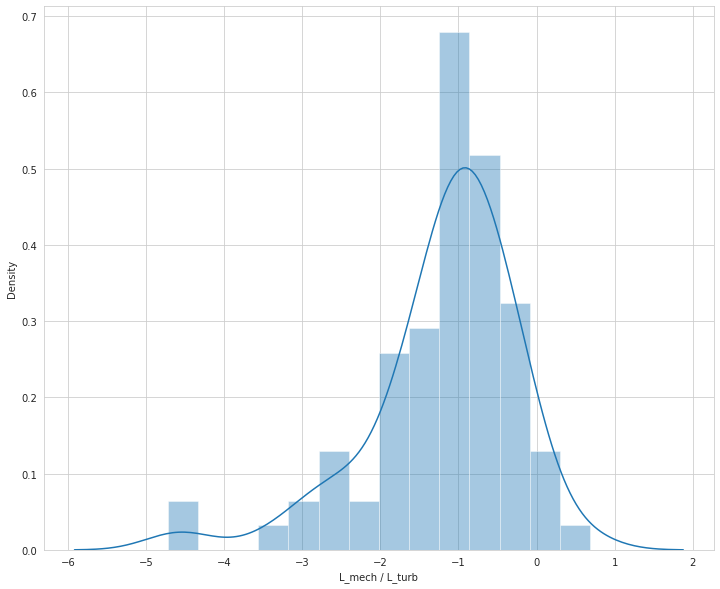

In [ ]:
.clouds_turb = QTable.read(filepath + '/data/outflowsClouds_Energy_turb2.fit')
clouds_turb
clouds_turb_ =  clouds_turb.to_pandas().dropna()
clouds_turb_['power_ratio'] = clouds_turb_['Outflow_Lum_mech']/(clouds_turb_['Cloud_Lum_turb']*1)
clouds_turb_ = clouds_turb_[clouds_turb_['power_ratio']>0]
print('average power ratio = ', np.log10(np.nanmean(clouds_turb_['power_ratio'])))

plt.figure(figsize=(12,10))
sns.distplot(np.log10(clouds_turb_['power_ratio']),axlabel='L_mech / L_turb')
plt.savefig('')

average power ratio =  -1.0093284947912529


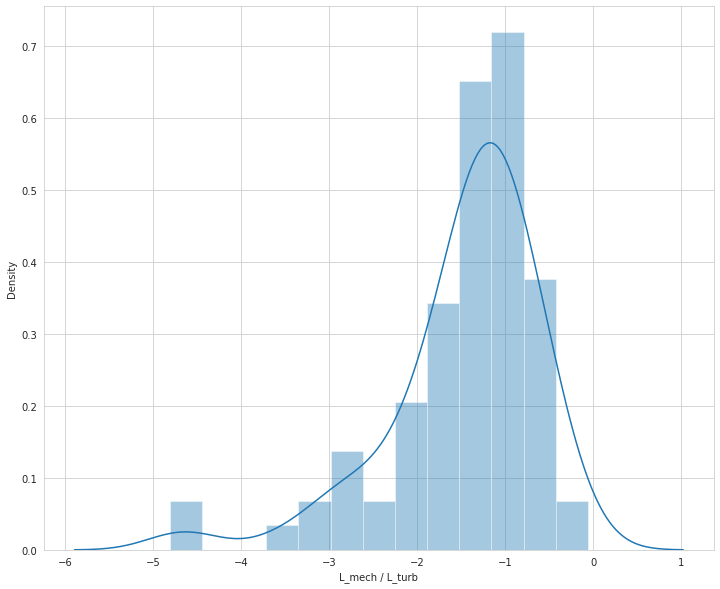

In [ ]:
clouds_turb = QTable.read(filepath + '/data/outflowsClouds_Energy_turb1.fit')
clouds_turb
clouds_turb_ =  clouds_turb.to_pandas().dropna()
clouds_turb_['power_ratio'] = clouds_turb_['Outflow_Lum_mech']/(clouds_turb_['Cloud_Lum_turb']*1)
clouds_turb_ = clouds_turb_[clouds_turb_['power_ratio']>0]
print('average power ratio = ', np.log10(np.nanmean(clouds_turb_['power_ratio'])))

plt.figure(figsize=(12,10))
sns.distplot(np.log10(clouds_turb_['power_ratio']),axlabel='L_mech / L_turb')

In [ ]:
#################################################################################################################################################################################################################################################
#################################################################################################################################################################################################################################################
################################################                                                     ############################################################################################################################################
################################################    POWER IN CLOUD CLUMPS TURBULENCE ENERGY          ############################################################################################################################################
################################################    LARGER GRIDS EACH with multiple outflows         ############################################################################################################################################
################################################                                                     ############################################################################################################################################
#################################################################################################################################################################################################################################################
#################################################################################################################################################################################################################################################


number_of_grids = []
length_scale = []
grid_size = []
power_ratio = []
log_power_ratio = []

In [ ]:
# test code >>>>> 

INFO: Setting slices=[0] [aplpy.core]
INFO: Auto-setting vmin to -1.576e+01 [aplpy.core]
INFO: Auto-setting vmax to  6.992e+01 [aplpy.core]
k-value= 0 
 l: 0 m: 0
k-value= 1 
 l: 0 m: 1
k-value= 2 
 l: 0 m: 2
k-value= 3 
 l: 0 m: 3
k-value= 4 
 l: 0 m: 4
k-value= 5 
 l: 0 m: 5
k-value= 6 
 l: 0 m: 6
k-value= 7 
 l: 0 m: 7
k-value= 8 
 l: 1 m: 0
k-value= 9 
 l: 1 m: 1
k-value= 10 
 l: 1 m: 2
k-value= 11 
 l: 1 m: 3
k-value= 12 
 l: 1 m: 4
k-value= 13 
 l: 1 m: 5
k-value= 14 
 l: 1 m: 6
k-value= 15 
 l: 1 m: 7
k-value= 16 
 l: 2 m: 0
k-value= 17 
 l: 2 m: 1
k-value= 18 
 l: 2 m: 2
k-value= 19 
 l: 2 m: 3
k-value= 20 
 l: 2 m: 4
k-value= 21 
 l: 2 m: 5
k-value= 22 
 l: 2 m: 6
k-value= 23 
 l: 2 m: 7
k-value= 24 
 l: 3 m: 0
k-value= 25 
 l: 3 m: 1
k-value= 26 
 l: 3 m: 2
k-value= 27 
 l: 3 m: 3
k-value= 28 
 l: 3 m: 4
k-value= 29 
 l: 3 m: 5
k-value= 30 
 l: 3 m: 6
k-value= 31 
 l: 3 m: 7
k-value= 32 
 l: 4 m: 0
k-value= 33 
 l: 4 m: 1
k-value= 34 
 l: 4 m: 2
k-value= 35 
 l: 4 m: 3
k-valu

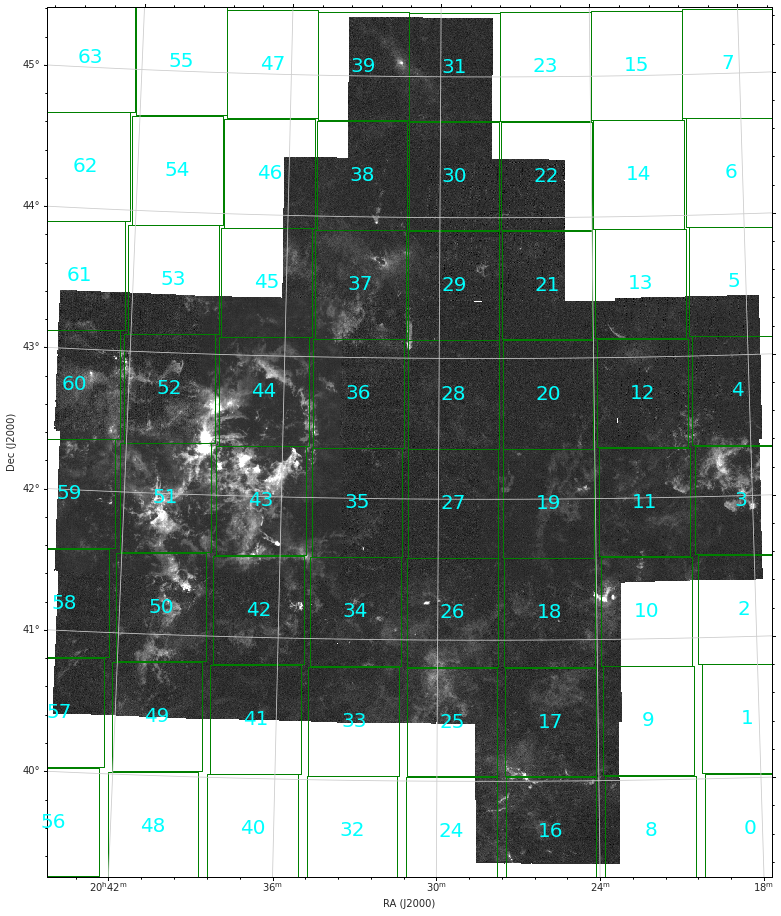

In [ ]:

%%time
from astropy.nddata import Cutout2D
from numpy import meshgrid
import sys 
import os
sys.path.append(filepath + '/data')
from cygFn import f, length, Jnu, G, Quad
## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# This is new, it will allow us to interact with 3d plots in the notebook
from mpl_toolkits.mplot3d import Axes3D
## This sets the plot style to have a grid on a white background
sns.set_style("whitegrid")
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore', category=UserWarning, append=True)

# constants >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
nu = 330.588 * u.GHz
Tbg = 2.73 * u.K
Aul = 6.038e-7 / u.s
B0 = 54891.42 * u.MHz
E3 = 30 * u.K
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

outflows = outflowsF # QTable.read('table_newfields_input.fit') ### CHANGE FIELD NAME ###


N=8 # <<<<<< VARIABLE >>>>>>>>>>>>>>>>>>
n_of = np.zeros(N**2)
L_mech_tot = np.zeros(N**2) * u.solLum
dist = np.zeros(N**2) * u.kpc
angle = np.zeros(N**2) * u.arcmin
L = np.zeros(N**2) * u.kpc

xmin = co.world_extrema[0][0] # 304.157172*u.deg
xmax = co.world_extrema[0][1] #311.481944*u.deg
ymin = co.world_extrema[1][0] #39.256583*u.deg 
ymax = co.world_extrema[1][1] #45.458596*u.deg
dx = np.abs(xmax - xmin) / N
dy = np.abs(ymax - ymin) / N

t = QTable(names=('Seq','L_mech_tot','Cloud_Mass','Cloud_En_turb','Cloud_Lum_turb'),
           dtype=('i8','f8','f8','f8','f8')) 
counter = 0

w0 = co.shape[2]/N # this is because cubes have vel, y/Dec, x/RA data in this order
h0 = co.shape[1]/N

#w0_21cm = cygx21cm.shape[2]/N # this is because cubes have vel, y/Dec, x/RA data in this order
#h0_21cm = cygx21cm.shape[1]/N

f = aplpy.FITSFigure(co_mom0.hdu,figsize=(18, 16))
f.show_grayscale()

# >>>>>> this part for displaying proto_flat and sf regions >>>>>>>>>>>>>>>>>>
# pixel size in deg 
        
ang_width = 1 * 14.6 * u.arcsec
cdelt = utils.proj_plane_pixel_scales(co.wcs)
width = (ang_width*0.5 / (cdelt[0] * u.deg)).to(u.dimensionless_unscaled).value
dv = cdelt[2]*1e-6*u.km/u.s
vlo1 = - 8.0*u.km/u.s # low negative velocity range: -8 =< v < 0
vhi1 = 1*u.km/u.s
# high positive velocity range: v > 8
vlo3 = 7*u.km/u.s + dv
vhi3 = 30*u.km/u.s
# >>>>>>>>>>>>>>>> GRIDS >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
k = 0
for l in range(N):
    for m in range(N):
        
        # TASK1: this extracts pixels based on 12co cube coordinates and slices segments from 12co map 
        lon_range = [xmin+l*dx, xmin+(l+1)*dx]
        lat_range = [ymin+m*dy, ymin+(m+1)*dy]
        
        xw = (lon_range[0]+lon_range[1])/2
        yw = (lat_range[0]+lat_range[1])/2
        
        x0, y0, _ = co.wcs.wcs_world2pix(xw, yw, 0, 0)
        f.show_rectangles(x0, y0, w0, h0, angle=0, layer=False, zorder=None,
                          coords_frame='pixel', edgecolor='green')
        f.add_label(xw.value, yw.value, str(k), color='cyan', size=20)

        position = (x0, y0)
        size = (w0, h0)     # pixels

        if l < N-1:
          lon_range = [xmin+l*dx, xmin+(l+1)*dx]
        elif l==N-1:
          lon_range = [xmin+l*1.005*dx, xmin+(l+1)*0.95*dx]

        print('k-value=',k,'\n', 'l:', l,'m:',m)
        try:
            #########################    sum outflow L_mech in each grid    ##########################################
            dist_list = []
            for z in range(0,len(outflows)):
              s1 = (outflows[z]['RAJ2000'] > xmin+(l*dx)) & (outflows[z]['RAJ2000'] < xmin+((l+1)*dx))
              s2 = (outflows[z]['DecJ2000'] > ymin+(m*dy)) & (outflows[z]['DecJ2000'] < ymin+((m+1)*dy))
              #s3 = (outflows.loc[z]['Distance'] != 0.65)
              if (s1 and s2) == True: # and s3
                  n_of[k] +=1
                  dist_list.append(outflows[z]['Distance'].value)
                  #dist[k] = dist[k] / n_of[k]                  
                  if outflows[z]['L_mech'] is NaN:
                    pass
                  else:
                    L_mech_tot[k] += outflows[z]['L_mech']
                    vals,counts = np.unique(dist_list, return_counts=True)
                    index = np.argmax(counts)
                    dist[k] = vals[index] * u.kpc
              else: 
                pass
        except IndexError:
          pass
          
        k +=1
        print('========================')
print(L_mech_tot)

#dist_avg = dist/n_of
print(n_of)
#print(dist_avg[n_of>0])

current grid: 0 0 and loop= 0
k-value= 0 

going to next loop: 1
current grid: 0 1 and loop= 1
k-value= 1 

going to next loop: 2
current grid: 0 2 and loop= 2
k-value= 2 

going to next loop: 3
current grid: 0 3 and loop= 3
k-value= 3 

outflow number 3.0


/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: All-NaN slice encountered
  **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 364, 274)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: All-NaN axis encountered
<string>:6: RuntimeWarning: All-NaN axis encountered


loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 4
current grid: 0 4 and loop= 4
k-value= 4 

going to next loop: 5
current grid: 0 5 and loop= 5
k-value= 5 

going to next loop: 6
current grid: 0 6 and loop= 6
k-value= 6 

going to next loop: 7
current grid: 0 7 and loop= 7
k-value= 7 

going to next loop: 8
current grid: 1 0 and loop= 8
k-value= 8 

going to next loop: 9
current grid: 1 1 and loop= 9
k-value= 9 

going to next loop: 10
current grid: 1 2 and loop= 10
k-value= 10 

outflow number 4.0


/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: All-NaN slice encountered
  **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 368, 339)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: All-NaN axis encountered
<string>:6: RuntimeWarning: All-NaN axis encountered


loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 11
current grid: 1 3 and loop= 11
k-value= 11 

outflow number 2.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 368, 334)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 12
current grid: 1 4 and loop= 12
k-value= 12 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: All-NaN slice encountered
  **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 367, 331)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: All-NaN axis encountered
<string>:6: RuntimeWarning: All-NaN axis encountered


loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 13
current grid: 1 5 and loop= 13
k-value= 13 

going to next loop: 14
current grid: 1 6 and loop= 14
k-value= 14 

going to next loop: 15
current grid: 1 7 and loop= 15
k-value= 15 

going to next loop: 16
current grid: 2 0 and loop= 16
k-value= 16 

outflow number 1.0
going to next loop: 17
current grid: 2 1 and loop= 17
k-value= 17 

going to next loop: 18
current grid: 2 2 and loop= 18
k-value= 18 

going to next loop: 19
current grid: 2 3 and loop= 19
k-value= 19 

outflow number 2.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 371, 330)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 20
current grid: 2 4 and loop= 20
k-value= 20 

outflow number 2.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 371, 327)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 21
current grid: 2 5 and loop= 21
k-value= 21 

going to next loop: 22
current grid: 2 6 and loop= 22
k-value= 22 

going to next loop: 23
current grid: 2 7 and loop= 23
k-value= 23 

going to next loop: 24
current grid: 3 0 and loop= 24
k-value= 24 

going to next loop: 25
current grid: 3 1 and loop= 25
k-value= 25 

outflow number 7.0


/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: All-NaN slice encountered
  **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 376, 335)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: All-NaN axis encountered
<string>:6: RuntimeWarning: All-NaN axis encountered


loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 26
current grid: 3 2 and loop= 26
k-value= 26 

outflow number 2.0


/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: All-NaN slice encountered
  **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 374, 330)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: All-NaN axis encountered
<string>:6: RuntimeWarning: All-NaN axis encountered


loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 27
current grid: 3 3 and loop= 27
k-value= 27 

going to next loop: 28
current grid: 3 4 and loop= 28
k-value= 28 

outflow number 2.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 374, 322)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 29
current grid: 3 5 and loop= 29
k-value= 29 

going to next loop: 30
current grid: 3 6 and loop= 30
k-value= 30 

going to next loop: 31
current grid: 3 7 and loop= 31
k-value= 31 

going to next loop: 32
current grid: 4 0 and loop= 32
k-value= 32 

going to next loop: 33
current grid: 4 1 and loop= 33
k-value= 33 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: All-NaN slice encountered
  **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 378, 331)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: All-NaN axis encountered
<string>:6: RuntimeWarning: All-NaN axis encountered


loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 34
current grid: 4 2 and loop= 34
k-value= 34 

outflow number 6.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 378, 326)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 35
current grid: 4 3 and loop= 35
k-value= 35 

going to next loop: 36
current grid: 4 4 and loop= 36
k-value= 36 

going to next loop: 37
current grid: 4 5 and loop= 37
k-value= 37 

outflow number 3.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 378, 315)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 38
current grid: 4 6 and loop= 38
k-value= 38 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: All-NaN slice encountered
  **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 378, 310)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: All-NaN axis encountered
<string>:6: RuntimeWarning: All-NaN axis encountered


loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 39
current grid: 4 7 and loop= 39
k-value= 39 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/spectral_cube/spectral_cube.py:443: RuntimeWarning: All-NaN slice encountered
  **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 379, 306)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: All-NaN axis encountered
<string>:6: RuntimeWarning: All-NaN axis encountered


loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 40
current grid: 5 0 and loop= 40
k-value= 40 

going to next loop: 41
current grid: 5 1 and loop= 41
k-value= 41 

going to next loop: 42
current grid: 5 2 and loop= 42
k-value= 42 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 382, 322)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 43
current grid: 5 3 and loop= 43
k-value= 43 

outflow number 13.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 382, 319)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 44
current grid: 5 4 and loop= 44
k-value= 44 

outflow number 10.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 381, 314)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 45
current grid: 5 5 and loop= 45
k-value= 45 

going to next loop: 46
current grid: 5 6 and loop= 46
k-value= 46 

going to next loop: 47
current grid: 5 7 and loop= 47
k-value= 47 

going to next loop: 48
current grid: 6 0 and loop= 48
k-value= 48 

going to next loop: 49
current grid: 6 1 and loop= 49
k-value= 49 

going to next loop: 50
current grid: 6 2 and loop= 50
k-value= 50 

outflow number 7.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 385, 319)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 51
current grid: 6 3 and loop= 51
k-value= 51 

outflow number 10.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 386, 315)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 52
current grid: 6 4 and loop= 52
k-value= 52 

outflow number 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in log10


Mass dimensions: (98, 385, 310)
loop 1 done
loop 2 done
loop 3 done
loop 4 done
loop 5 done
going to next loop: 53
current grid: 6 5 and loop= 53
k-value= 53 

going to next loop: 54
current grid: 6 6 and loop= 54
k-value= 54 

going to next loop: 55
current grid: 6 7 and loop= 55
k-value= 55 

going to next loop: 56
current grid: 7 0 and loop= 56
k-value= 56 

going to next loop: 57
current grid: 7 1 and loop= 57
k-value= 57 

going to next loop: 58
current grid: 7 2 and loop= 58
k-value= 58 

going to next loop: 59
current grid: 7 3 and loop= 59
k-value= 59 

going to next loop: 60
current grid: 7 4 and loop= 60
k-value= 60 

outflow number 4.0
going to next loop: 61
current grid: 7 5 and loop= 61
k-value= 61 

going to next loop: 62
current grid: 7 6 and loop= 62
k-value= 62 

going to next loop: 63
current grid: 7 7 and loop= 63
k-value= 63 

going to next loop: 64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


average log power ratio =  -0.009282186196376852 
 average power ratio 1.0216030625876982
75.0
median power ratio= -0.6675537840900172


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,number_of_grids,grid_size(arcmin),length_scale (kpc),power_ratio,log_power_ratio
1,900,12.687499,0.004687,0.000374,-3.427572
2,900,12.687499,0.004687,0.145065,-0.838437
0,64,47.031247,0.017949,0.000873,-3.058994
3,64,47.031247,0.017949,0.215004,-0.667554


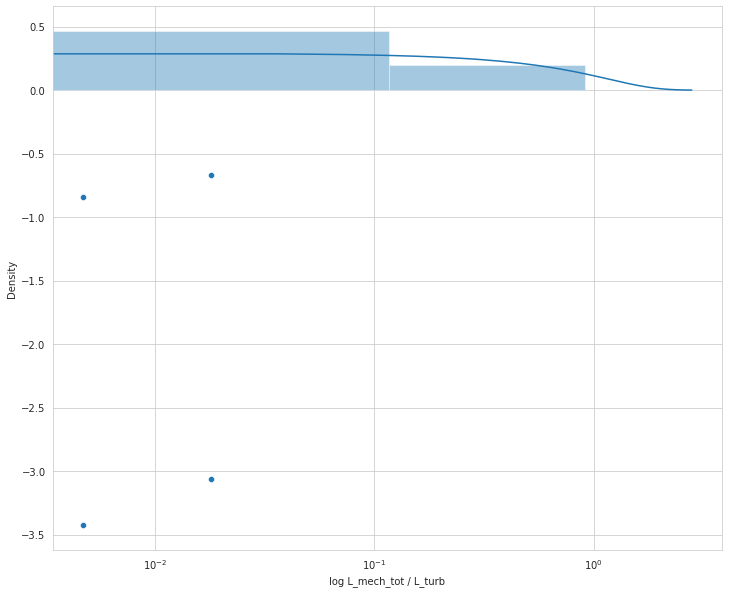

In [ ]:
## >>>>>>>>>>>>>>> vectorization 

sys.path.append(filepath + '/data')
from N13mass import mass
# multiprocessing.Process(target= sleepy_man)

#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
energy_cloud = np.zeros(N**2) 
lum_cloud = np.zeros(N**2) * u.solLum 
k =0
for l in range(N): 
    for m in range(N):
        #l=7
        #m=5
        print('current grid:',l,m,'and loop=',k)
        # TASK1: this extracts pixels based on 12co cube coordinates and slices segments from 12co map 
        lon_range = [xmin+l*dx, xmin+(l+1)*dx]
        lat_range = [ymin+m*dy, ymin+(m+1)*dy]
        
        xw = (lon_range[0]+lon_range[1])/2 # grid mid-point 
        yw = (lat_range[0]+lat_range[1])/2
        
        x0, y0, _ = co.wcs.wcs_world2pix(xw, yw, 0, 0)
        if l < N:
          lon_range = [xmin+l*dx, xmin+(l+1)*dx]
        elif l==N:
          lon_range = [xmin+l*1.005*dx, xmin+(l+1)*0.95*dx]

        print('k-value=',k,'\n')
        try:
            #########################    Cloud energy calc.    ##########################################
            sub_cube_co = co.subcube(xlo=lon_range[0], xhi=lon_range[1], ylo=lat_range[0], yhi=lat_range[1])
            ##>>>>>>>>>>> here goes energy for outflows and clouds
            if n_of[k] > 0:
              #do this  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
              print('outflow number', n_of[k]) 
              RA = outflows[z]['RAJ2000'].value 
              Dec = outflows[z]['DecJ2000'].value
              
              # 4 beamsize in pix 
              #boxC = ((8 * cdelt[0]*u.deg)/(cdelt[0]*u.deg)).to(u.dimensionless_unscaled).value
              cloud = sub_cube_co #co[:, int(y0-boxC):int(y0+boxC), int(x0-boxC):int(x0+boxC)] # <<<-----------------------------


              cloudshape = cloud[0].shape # x, y axes dimensions 
              vaxis=cloud.spectral_axis.value 
                   
              v0array = np.zeros(cloudshape)
              sig0array = np.zeros(cloudshape)
              amparray= np.zeros(cloudshape)
              from astropy import units as u
              
              ## >>>>>>>>>>>>>  MAKE A FUNCTION >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
              Tpeak = cloud.max(axis=0) * u.K   # <<<<--- change to u.K for big cube --->>>>
              nu = 330.588 * u.GHz
              Tbg = 2.73 * u.K
              Aul = 6.038e-7 / u.s
              B0 = 54891.42 * u.MHz
              E3 = 30 * u.K
              Tex = ((con.h * nu / con.k_B)
                      / np.log(1 + con.h * nu
                              / (con.k_B * (Tpeak + Jnu(Tbg, nu=nu)))))
              Tex = Tex.to(u.K)
              co13cloud = np.zeros_like(cloud)

              DeltaNu = np.abs((vaxis[1] - vaxis[0]) * u.km / u.s/ con.c * nu).to(u.Hz)
              DeltaV = np.abs((vaxis[1] - vaxis[0]) * u.km/u.s)

              log_co13cloud = 2.074571 * np.log10(cloud) - 2.699635
              co13cloud=10**log_co13cloud

              tau13dnu = co13cloud * DeltaV 

              N13co = (8 * np.pi * nu**3 / con.c**3 / Aul
                              /(np.exp(con.h * nu / con.k_B / Tex) - 1) * tau13dnu
                              )
              Qrot = con.k_B * Tex / (con.h * B0) * np.exp(con.h * B0
                                                                      / (3 * con.k_B * Tex))

              N13coTot = Qrot / 7 * np.exp(E3 / Tex) * N13co # g_u=7 for u=3, l=2 transition Qrot

              NH2 = (7.5e5 * N13coTot).to(u.cm**(-2))

              apix = np.prod(
                    np.abs(np.array([width, 1]) 
                            * (sub_cube_co.wcs.celestial.wcs.get_cdelt())
                        / 180 * np.pi *outflows[z]['Distance'].value)) * u.kpc**2
              Mass = (NH2 * con.m_n * 2.32 * apix).to(u.solMass)
              print('Mass dimensions:',Mass.shape)             

              #Mass = mass(cloud)
              # >>>>>>>>>>>>>>>>>>>>  FUNCTION    >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

              
              #### sigma calculation 
              Tpeak=np.ones(cloudshape)
              vpeak=np.ones(cloudshape) * u.km/u.s
              sigma=np.ones(cloudshape)
              vaxis=cloud.spectral_axis.value
              # .............................. LOOP 1 ......................................................
              spec = cloud # removes unit=K
              Tpeak = np.nanmax(spec,axis=0)
              
              #if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel
               # print('NaN pixel')
               # pass
              # else:                  
              try:
                ai = np.nanargmax(spec, axis=0)
                vpeak = vaxis[ai] * u.km/u.s
              except ValueError :
                pass
              
              hf = Tpeak/2

              slice_unmasked = cloud.unmasked_data[:,:,:]  
              velo, dec, ra = cloud.world[:] 
              mask = slice_unmasked > hf
              border = np.logical_or(mask * np.roll(~mask, 1,axis=0),mask * np.roll(~mask, -1, axis=0))
              vcube = velo * 1
              vcube[~border] = np.nan
              dvcube_pos = vcube - vpeak[np.newaxis, :, :] #* u.km/u.s
              dvcube_neg = -1 * dvcube_pos
              dvcube_neg[dvcube_neg < 0] = np.nan
              dvcube_pos[dvcube_pos < 0] = np.nan
              dv_pos = np.nanmin(dvcube_pos, axis=0)
              dv_neg = np.nanmin(dvcube_neg, axis=0)
              HWHM = np.minimum(dv_pos, dv_neg)
              sigma = HWHM/((2*np.log(2))**0.5) 
              # ...............................................................................................            
              print("loop 1 done")  
             
              
              n=int(vaxis.shape[0]/2) #this integer must be less than spectral pixel number
              Energy = np.zeros(shape=(n, cloudshape[0],cloudshape[1]))*u.erg
              vcen = np.zeros(shape=(n, cloudshape[0],cloudshape[1])) 
              vcentr = np.zeros(cloudshape) # dim should be equal to the number of spatial pixels along the mass pv slice

              l1 = vpeak - 2*sigma # <<<<<<<<<<<<<<<<<<<<<<<<  SHOULD IT BE 5 ??? YES THIS RANGE IS JUST USED TO FIND E_MIN AT WHAT VEL
              u1 = vpeak + 2*sigma
              vcen = np.linspace(l1,u1,n) # half of spectral pixels     
              print("loop 2 done")  

                                        
              #if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel
                            #print('nan-pixel encountered in line center calc')
                #vcentr = np.nanmean(vcentr)
              #else:
                #print('non nan pixel')  
        
              for indx in range(n): ### <<<<<<<<<<<<<<<<<<<<<<< DOES NOT WORK FROM THIS LINE <<<<<<<-------------------------------------------------
                voff = vcen[indx, :, :] - (vaxis[:, np.newaxis, np.newaxis])*u.km/u.s#*u.km**2/u.s**2
                Energy[indx,:,:] = (np.nansum(Mass*voff**2)).to(u.erg)#SUM OVER vaxis for each of vcen VALUES  
                vcentr = vcen[np.nanargmin(Energy[indx,:,:])]
              print("loop 3 done")   

              from astropy import units as u
              energyC = np.zeros(cloudshape) * u.solMass * (u.km/u.s)**2
              turbLum = np.zeros(cloudshape) * u.solLum

              angle[k] = (cloudshape[0] * (cdelt[0] * u.deg)).to(u.arcmin)
              L[k] = (((cloudshape[0] * (cdelt[0] * u.deg)).to(u.rad)) /(1*u.rad)).to(u.dimensionless_unscaled) * dist[k]     #<<<<<<<<<<< size of cloud <<<<<<<<<<<<<<<<<<<<<<<<<<<<<
           
              #if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel                           
                  #massvecC = 0
                  #energyC = 0
              #else:  
              vaxis_new = vaxis[:, np.newaxis, np.newaxis]*u.km/u.s         
              voff = vcentr-vaxis_new
              idxC = (vaxis_new > vcentr - 3*sigma) & (vaxis_new < vcentr + 3*sigma)
              energyC = 0.5 * np.nansum(Mass[idxC] * voff[idxC]**2)
              turbLum = (np.nansum(Mass[idxC] * np.abs(voff[idxC])**3)/L[k]).to(u.solLum)
              print('loop 4 done')   
              energy_cloud[k] = energyC.sum().to(u.erg)/(1e44*u.erg) # units of 1e44*u.erg *u.solMass*u.km**2/u.s**2)
              lum_cloud[k] = turbLum.sum()#.to(u.solLum)
              print('loop 5 done')
              #t.add_row([z+1, np.round(L_mech_tot,3), np.round(mass_cloud,3), np.round(energy_cloud,3), np.round(lum_cloud,3)])     
            else:
              pass
        except IndexError:
          pass
          
        k += 1
        print('going to next loop:',k)
        #break
########################################## HISTOGRAM ###########################################################################
cloud_energy = pd.DataFrame({'outflow_number': n_of, 'L_mech_tot (solLum)':L_mech_tot, 'cloud_energy(10^44 erg)':energy_cloud, 'cloud_turb_lum (solLum)': lum_cloud}).sort_values('outflow_number', ascending=False)#.dropna()



cloud_energy.to_csv(filepath + '/data/cloud_energy_N'+str(N)+'.csv') # <<<<<<<<<<< NAME >>>>>>>>>>>
cloud_energy= cloud_energy[cloud_energy['cloud_turb_lum (solLum)']>0]
cloud_energy['power_ratio'] = cloud_energy['L_mech_tot (solLum)']/cloud_energy['cloud_turb_lum (solLum)']
cloud_energy = cloud_energy[cloud_energy['power_ratio']>0]
#cloud_energy= cloud_energy[cloud_energy['power_ratio']<10e5]
print('average log power ratio = ', np.log10(np.nanmean(cloud_energy['power_ratio'])),'\n average power ratio',1/np.nanmean(cloud_energy['power_ratio']) )
print(cloud_energy['outflow_number'].sum())
plt.figure(figsize=(12,10))
sns.distplot(np.log10(cloud_energy['power_ratio']),axlabel='log L_mech_tot / L_turb')
plt.axvline(np.median(np.log10(cloud_energy['power_ratio'])),color='b', linestyle='--')
print('median power ratio=', np.median(np.log10(cloud_energy['power_ratio'])))
plt.savefig(filepath + '/output/power_ratio_N'+str(N)+'.pdf') # <<<<<<<<<<< NAME >>>>>>>>>>>


####>>>>>>>>>>>>>>>>>>>>>>>>>>> POWER RATIO VS LENGTH SCALE >>>>>>>>>>>>>>>>>
number_of_grids.append(N*N)
angle_avg = angle[angle>0].mean()
L_avg = L[L>0].mean()
length_scale.append(L_avg.value)
grid_size.append(angle_avg.value)

#power_ratio.append(vals[index])
#log_power_ratio.append(np.log10(vals[index]))
power_ratio.append(np.median(cloud_energy['power_ratio']))
log_power_ratio.append(np.median(np.log10(cloud_energy['power_ratio'])))

power_length_scale = pd.DataFrame({'number_of_grids':number_of_grids, 'grid_size(arcmin)':grid_size,'length_scale (kpc)': length_scale, 'power_ratio':power_ratio, 'log_power_ratio':log_power_ratio})
power_length_scale.to_csv(filepath + '/data/power_length_scale_modal.csv') # MOST COMMON POWER RATIO



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


median power ratio= -0.6675537840900172


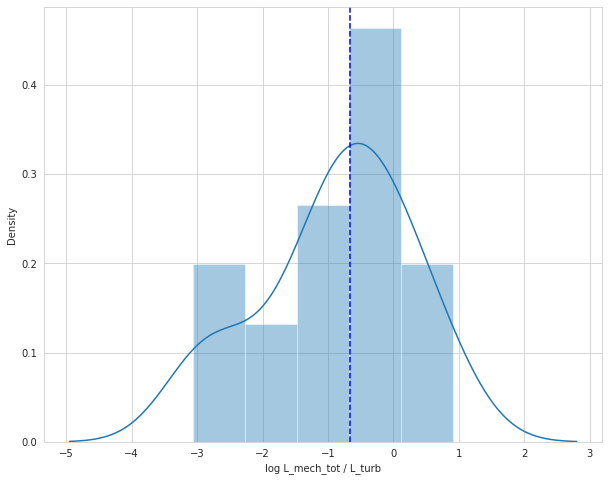

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(np.log10(cloud_energy['power_ratio']),axlabel='log L_mech_tot / L_turb')
plt.axvline(np.median(np.log10(cloud_energy['power_ratio'])),color='b', linestyle='--')
print('median power ratio=', np.median(np.log10(cloud_energy['power_ratio'])))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Unnamed: 0,number_of_grids,grid_size(arcmin),length_scale (kpc),power_ratio,log_power_ratio
0,2,900,12.687499,0.004687,0.145065,-0.838437
1,3,64,47.031247,0.017949,0.215004,-0.667554


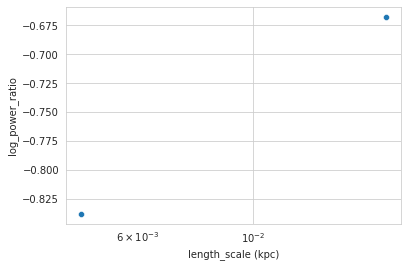

In [ ]:
power_length_scale = pd.read_csv(filepath + '/data/power_length_scale_modal.csv')
sns.scatterplot(power_length_scale['length_scale (kpc)'], power_length_scale['log_power_ratio'])
plt.xscale('log')
#plt.yscale('log')
power_length_scale.sort_values('number_of_grids', ascending=False)

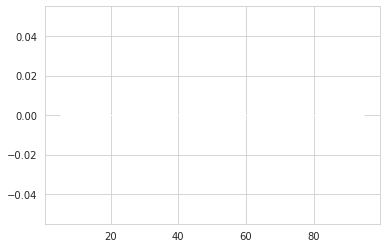

the most frequent bin:(5.0,23.0)
the mode:14.0


In [ ]:
import numpy as np  
import matplotlib.pyplot as plt

# generate random numbers following normal distribution

# create the histogram
n, bins, patches = plt.hist(np.log10(cloud_energy['power_ratio']), bins=5, range=(5, 95))  

# show the histogram
plt.show()


mode_index = n.argmax()
# the most frequent bin
print('the most frequent bin:(' + str(bins[mode_index]) + ',' + str(bins[mode_index+1]) + ')')
# the mode         
print('the mode:'+ str((bins[mode_index] + bins[mode_index+1])/2))





import numpy as np
import pandas as pd

# Make data
np.random.seed(0)
data = pd.Series(np.random.randint(1, 10, size=100))
# Make bins
bins = np.arange(data.min(), data.max() + 2)
# Compute histogram
h, _ = np.histogram(data, bins)
# Find most frequent value
mode = bins[h.argmax()]
# Mode computed with Pandas
mode_pd = data.value_counts().nlargest(1).index[0]
# Check result
print(mode == mode_pd)
# True

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,number_of_grids,grid_size(arcmin),length_scale (kpc),power_ratio,log_power_ratio
1,900,12.687499,0.004687,0.000374,-3.427572
2,900,12.687499,0.004687,0.145065,-0.838437
0,64,47.031247,0.017949,0.000873,-3.058994


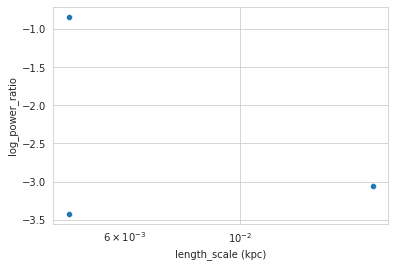

In [ ]:
# >>> run this for N=30, 25, 22, 20, 17, 15, 12, 11, 10, 9, 7, 5, 3
#vals,counts = np.unique(cloud_energy['power_ratio'], return_counts=True)
#index = np.argmax(counts)



In [ ]:
number_of_grids.append(N*N)
angle_avg = angle[angle>0].mean()
L_avg = L[L>0].mean()
length_scale.append(L_avg.value)
grid_size.append(angle_avg.value)
power_ratio.append(np.nanmean(cloud_energy['power_ratio']))
log_power_ratio.append(np.log10(np.nanmean(cloud_energy['power_ratio'])))


NameError: ignored

In [ ]:
cloud_energy['power_ratio'].mean()

0.31178915030797927

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,number_of_grids,grid_size(arcmin),length_scale (kpc),avg_power_ratio,avg_log_power_ratio
1,625,15.182926,0.005647,1.237417,0.092516
0,400,18.963413,0.007039,1.356794,0.132514
5,225,25.218748,0.009333,0.868052,-0.061454
6,144,31.379628,0.011485,0.943337,-0.025333
7,121,34.245190,0.012733,0.337821,-0.471313
4,100,37.684998,0.013969,0.779221,-0.108339
8,81,41.767854,0.015809,0.316551,-0.499557
9,64,47.031247,0.017949,0.978854,-0.009282
3,49,53.656247,0.019153,0.380450,-0.419703
2,25,74.722217,0.026521,0.497703,-0.303030


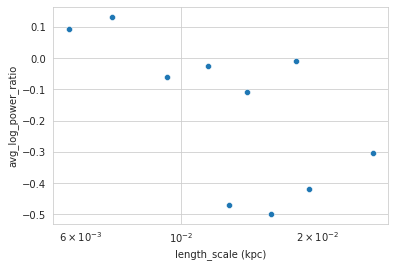

In [ ]:
power_length_scale = pd.DataFrame({'number_of_grids':number_of_grids, 'grid_size(arcmin)':grid_size,'length_scale (kpc)': length_scale, 'avg_power_ratio':power_ratio, 'avg_log_power_ratio':log_power_ratio})
power_length_scale.to_csv(filepath + '/data/power_length_scale.csv')

sns.scatterplot(power_length_scale['length_scale (kpc)'], power_length_scale['avg_log_power_ratio'])
plt.xscale('log')
#plt.yscale('log')
power_length_scale.sort_values('number_of_grids', ascending=False)

In [ ]:
values, counts = np.unique(dist.value, return_counts=True)
values,counts
values[counts.argmax()]

(array([ 0.  ,  1.5 ,  2.6 ,  3.65,  4.5 ,  7.5 ,  8.15, 12.7 , 13.35,
        17.4 , 33.15]), array([13,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1]))

In [ ]:
cloudshape,cdelt


((124, 99), array([2.0833332e-03, 2.0833332e-03, 4.2335001e+02]))

In [ ]:
power_length_scale

,number_of_grids,grid_size(arcmin),length_scale (kpc),power_ratio,log_power_ratio
0,400,10.616666,0.004632,0.880476,-0.055283


In [ ]:
number_of_grids.append(N*N)

In [ ]:
print('grid size =', ((L/(1.5*u.kpc))*u.rad).to(u.arcmin))
cloud_energy= cloud_energy[cloud_energy['cloud_turb_lum (solLum)']>0]
cloud_energy['power_ratio'] = cloud_energy['L_mech_tot (solLum)']/(cloud_energy['cloud_turb_lum (solLum)']*1)
cloud_energy= cloud_energy[cloud_energy['power_ratio']>0]
#cloud_energy= cloud_energy[cloud_energy['power_ratio']<10e5]
print('average log power ratio = ', np.log10(np.nanmean(cloud_energy['power_ratio'])),'\n average power ratio',1/np.nanmean(cloud_energy['power_ratio']) )

,Unnamed: 0,outflow_number,L_mech_tot (solLum),cloud_energy(10^44 erg),cloud_turb_lum (solLum)
0,75,9.0,0.126059,7046.354907,12.060920
1,74,8.0,13.624966,7840.253528,13.131259
2,42,7.0,0.026069,80.238372,0.066160
3,73,6.0,0.102862,1174.183888,1.124041
4,84,6.0,0.199373,2454.088989,2.684747
...,...,...,...,...,...
95,36,0.0,0.000000,0.000000,0.000000
96,35,0.0,0.000000,0.000000,0.000000
97,34,0.0,0.000000,0.000000,0.000000
98,33,0.0,0.000000,0.000000,0.000000


In [ ]:
from scipy import ndimage

b = np.array(([1,1],
              [1,1],))
print(b)
ndimage.distance_transform_edt(b)

array([[0, 1, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 0, 0]])

In [4]:
#>>>>>>>>>>>>>>>>>>>>>> TEST CODES: boundary with length scale
from scipy import ndimage
cloud_dummy = np.ones_like(cygX0[0,:,:])

# Transform world coordinates to pixel coordinates for all outflow locations 
# change values on such coordinate from 1 to 0
for z in range(0,83):
  xw = outflows[z]['RAJ2000']
  yw = outflows[z]['DecJ2000']
  xpix, ypix, _ = cygX0.wcs.wcs_world2pix(xw, yw, 0, 0)
  #print('outflow',z,xpix, ypix)
  try:
    cloud_dummy[int(ypix), int(xpix)] = 0
  except IndexError:
    print('outflow', z, 'raises index error')
    pass


# Apply EDT and get distance array 
cloud_EDT, inds = ndimage.distance_transform_edt(np.array((cloud_dummy)),return_indices=True)
cdelt = cygX0.wcs.celestial.wcs.get_cdelt()

length_scale_kpc = 0.004686572 * u.kpc # a temp value for testing the code 
length_scale_pix = ((length_scale_kpc / (1.5 * u.kpc))*u.radian).to(u.deg) # in Radian
length_scale_pix = np.round(length_scale_pix / (np.abs(cdelt[0]) * u.deg), 0)


# create a mask based on length scale and apply the mask on data cube 
from astropy import units as u
from spectral_cube import BooleanArrayMask
mask = BooleanArrayMask(mask=np.where(cloud_EDT<length_scale_pix,cloud_EDT, 0), wcs=cygX0.wcs)  
mask2d = cloud_EDT < length_scale_pix
#mask3d = BooleanArrayMask(mask=np.ones(cygX0.shape[0])[:, np.newaxis, np.newaxis] * mask2d[np.newaxis, : ,:], wcs=cygX0.wcs)
cygX0_masked = cygX0.with_mask(mask)
cygX0_masked = cygX0_masked.with_spectral_unit(u.km/u.s)

#cygX0_mom0_along_z = cygX0.moment(order=0, axis=0)  



In [12]:
cygX0_masked.shape, mask2d.shape, mask.shape

((171, 2966, 2471), (2966, 2471), (2966, 2471))

In [ ]:
(np.ones(cygX0.shape[0])[:, np.newaxis, np.newaxis]) * mask2d[np.newaxis, : ,:]

In [11]:
mask2d[np.newaxis, : ,:].shape

(1, 2966, 2471)

In [ ]:


### >>>>>> CLOUD ENERGY FOR MASKED CLOUD REGION >>>>>>>>>>>>>>>>>> 
cloud = cygX0_masked
cloudshape = cloud[0].shape # x, y axes dimensions 
vaxis=cloud.spectral_axis.value 
                   
v0array = np.zeros(cloudshape)
sig0array = np.zeros(cloudshape)
amparray= np.zeros(cloudshape)
from astropy import units as u
              
## >>>>>>>>>>>>>  MAKE A FUNCTION >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


Tpeak = cloud.max(axis=0) * u.K   # <<<<--- change to u.K for big cube --->>>>
nu = 330.588 * u.GHz
Tbg = 2.73 * u.K
Aul = 6.038e-7 / u.s
B0 = 54891.42 * u.MHz
E3 = 30 * u.K
Tex = ((con.h * nu / con.k_B)
                      / np.log(1 + con.h * nu
                              / (con.k_B * (Tpeak + Jnu(Tbg, nu=nu)))))
Tex = Tex.to(u.K)
co13cloud = np.zeros_like(cloud)

DeltaNu = np.abs((vaxis[1] - vaxis[0]) * u.km / u.s/ con.c * nu).to(u.Hz)
DeltaV = np.abs((vaxis[1] - vaxis[0]) * u.km/u.s)

log_co13cloud = 2.074571 * np.log10(cloud) - 2.699635
co13cloud=10**log_co13cloud

tau13dnu = co13cloud * DeltaV

N13co = (8 * np.pi * nu**3 / con.c**3 / Aul
/(np.exp(con.h * nu / con.k_B / Tex) - 1) * tau13dnu
)
Qrot = con.k_B * Tex / (con.h * B0) * np.exp(con.h * B0
/ (3 * con.k_B * Tex))

N13coTot = Qrot / 7 * np.exp(E3 / Tex) * N13co # g_u=7 for u=3, l=2 transition Qrot

NH2 = (7.5e5 * N13coTot).to(u.cm**(-2))

apix = np.prod(
np.abs(np.array([width, 1])
* (sub_cube_co.wcs.celestial.wcs.get_cdelt())
/ 180 * np.pi *outflows[z]['Distance'].value)) * u.kpc**2
Mass = (NH2 * con.m_n * 2.32 * apix).to(u.solMass)
print('Mass dimensions:',Mass.shape)

#Mass = mass(cloud)
# >>>>>>>>>>>>>>>>>>>>  FUNCTION    >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


#### sigma calculation
Tpeak=np.ones(cloudshape)
vpeak=np.ones(cloudshape) * u.km/u.s
sigma=np.ones(cloudshape)
vaxis=cloud.spectral_axis.value
# .............................. LOOP 1 ......................................................
spec = cloud # removes unit=K
Tpeak = np.nanmax(spec,axis=0)

#if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel
# print('NaN pixel')
# pass
# else:
try:
  ai = np.nanargmax(spec, axis=0)
  vpeak = vaxis[ai] * u.km/u.s
except ValueError :
  pass

hf = Tpeak/2

slice_unmasked = cloud.unmasked_data[:,:,:]
velo, dec, ra = cloud.world[:]
mask = slice_unmasked > hf
border = np.logical_or(mask * np.roll(~mask, 1,axis=0),mask * np.roll(~mask, -1, axis=0))
vcube = velo * 1
vcube[~border] = np.nan
dvcube_pos = vcube - vpeak[np.newaxis, :, :] #* u.km/u.s
dvcube_neg = -1 * dvcube_pos
dvcube_neg[dvcube_neg < 0] = np.nan
dvcube_pos[dvcube_pos < 0] = np.nan
dv_pos = np.nanmin(dvcube_pos, axis=0)
dv_neg = np.nanmin(dvcube_neg, axis=0)
HWHM = np.minimum(dv_pos, dv_neg)
sigma = HWHM/((2*np.log(2))**0.5)
# ...............................................................................................
print("loop 1 done")


n=int(vaxis.shape[0]/2) #this integer must be less than spectral pixel number
Energy = np.zeros(shape=(n, cloudshape[0],cloudshape[1]))*u.erg
vcen = np.zeros(shape=(n, cloudshape[0],cloudshape[1]))
vcentr = np.zeros(cloudshape) # dim should be equal to the number of spatial pixels along the mass pv slice

l1 = vpeak - 2*sigma # <<<<<<<<<<<<<<<<<<<<<<<<  SHOULD IT BE 5 ??? YES THIS RANGE IS JUST USED TO FIND E_MIN AT WHAT VEL
u1 = vpeak + 2*sigma
vcen = np.linspace(l1,u1,n) # half of spectral pixels
print("loop 2 done")


#if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel
#print('nan-pixel encountered in line center calc')
#vcentr = np.nanmean(vcentr)
#else:
#print('non nan pixel')

for indx in range(n): ### <<<<<<<<<<<<<<<<<<<<<<< DOES NOT WORK FROM THIS LINE <<<<<<<-------------------------------------------------
  voff = vcen[indx, :, :] - (vaxis[:, np.newaxis, np.newaxis])*u.km/u.s#*u.km**2/u.s**2
  Energy[indx,:,:] = (np.nansum(Mass*voff**2)).to(u.erg)#SUM OVER vaxis for each of vcen VALUES
  vcentr = vcen[np.nanargmin(Energy[indx,:,:])]
  print("loop 3 done")

  from astropy import units as u
  energyC = np.zeros(cloudshape) * u.solMass * (u.km/u.s)**2
  turbLum = np.zeros(cloudshape) * u.solLum

  angle[k] = (cloudshape[0] * (cdelt[0] * u.deg)).to(u.arcmin)
  L[k] = (((cloudshape[0] * (cdelt[0] * u.deg)).to(u.rad)) /(1*u.rad)).to(u.dimensionless_unscaled) * dist[k]     #<<<<<<<<<<< size of cloud <<<<<<<<<<<<<<<<<<<<<<<<<<<<<

  #if sum(np.isnan(spec)) == len(spec): # condtion for all NaN-pixel
  #massvecC = 0
  #energyC = 0
  #else:
  vaxis_new = vaxis[:, np.newaxis, np.newaxis]*u.km/u.s
  voff = vcentr-vaxis_new
  idxC = (vaxis_new > vcentr - 3*sigma) & (vaxis_new < vcentr + 3*sigma)
  energyC = 0.5 * np.nansum(Mass[idxC] * voff[idxC]**2)
  turbLum = (np.nansum(Mass[idxC] * np.abs(voff[idxC])**3)/L[k]).to(u.solLum)
  print('loop 4 done')
  energy_cloud[k] = energyC.sum().to(u.erg)/(1e44*u.erg) # units of 1e44*u.erg *u.solMass*u.km**2/u.s**2)
  lum_cloud[k] = turbLum.sum()#.to(u.solLum)
  print('loop 5 done')
#t.add_row([z+1, np.round(L_mech_tot,3), np.round(mass_cloud,3), np.round(energy_cloud,3), np.round(lum_cloud,3)])


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'VOPT'  
CRVAL : 307.04166  43.408333  5000.0  
CRPIX : 1499.0  1964.0  86.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0020833332  0.0020833332  423.35001  
NAXIS : 0  0

In [ ]:
cygX0.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'VOPT'  
CRVAL : 307.04166  43.408333  5000.0  
CRPIX : 1499.0  1964.0  86.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0020833332  0.0020833332  423.35001  
NAXIS : 0  0

In [ ]:
cygX0_masked.sum(axes=(1,2)) 

ValueError: ignored

INFO: Auto-setting vmin to -2.521e+04 [aplpy.core]
INFO: Auto-setting vmax to  8.514e+04 [aplpy.core]


<Figure size 1296x1152 with 0 Axes>

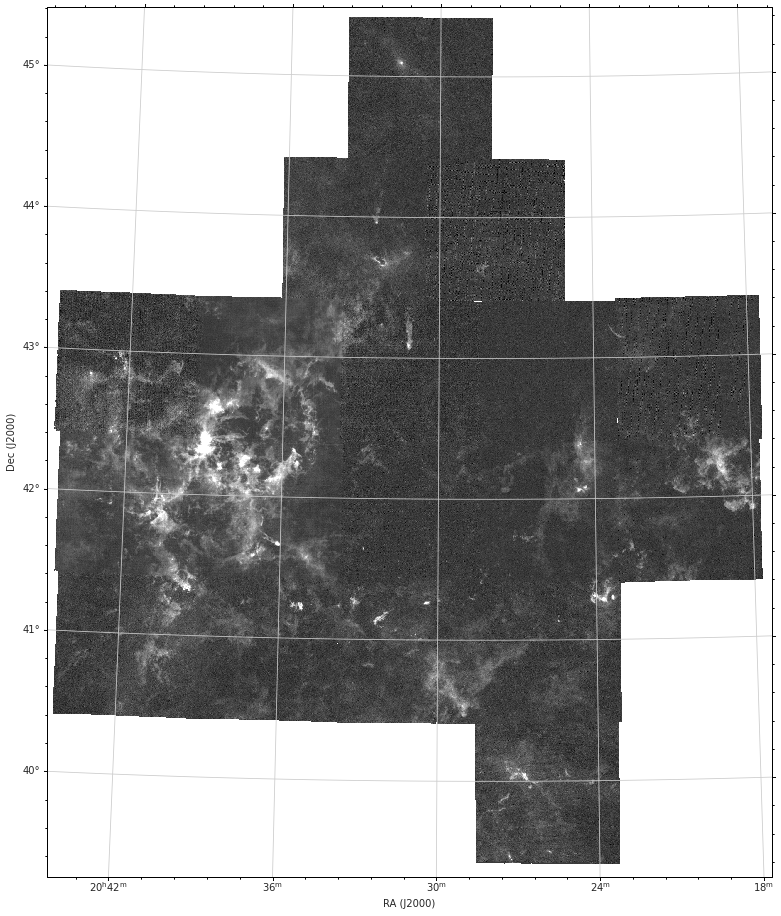

In [ ]:
#co_mom0[0,:,:].shape#[cloud_EDT<86]
plt.figure(figsize=(18, 16))
f = aplpy.FITSFigure(cygX0_mom0_along_z.hdu,figsize=(18, 16))
#.show_colorscale()
f.show_grayscale()

In [ ]:
length_scale_pix

<Quantity 86.>

INFO: Auto-setting vmin to -8.490e+00 [aplpy.core]
INFO: Auto-setting vmax to  9.424e+01 [aplpy.core]


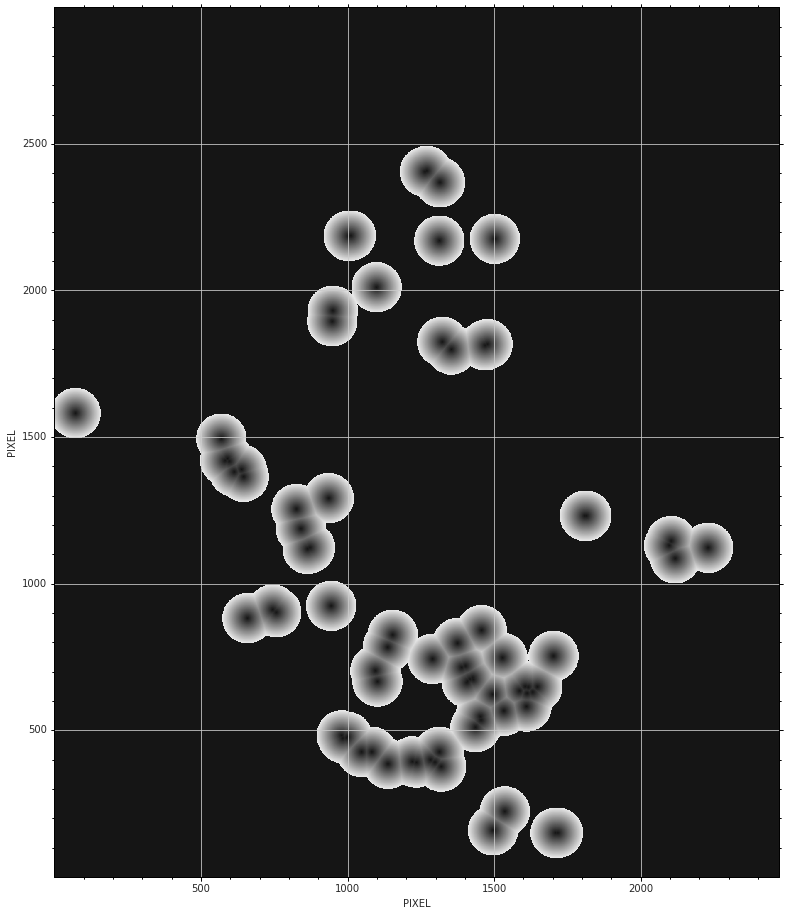

In [10]:
f = aplpy.FITSFigure(np.where(cloud_EDT<86,cloud_EDT, 0),figsize=(18, 16))
#.show_colorscale()
f.show_grayscale()

In [ ]:
##########################################################################################################################################

In [ ]:
#################################################################################################################################

In [ ]:
################## DO  NOT RUN #####################
from astropy.utils import data
from spectral_cube import SpectralCube
fn = data.get_pkg_data_filename(filepath + '/data/co_spec_cropped.fits', 'spectral_cube')
cube = SpectralCube.read(fn, use_dask=True)
cube
######################################
sys.path.append(filepath + '/data')
from N13mass import mass
mass(cloud, vaxis)
###########################
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

try:
  ai = np.nanargmax(spec, axis=0)
  vpeak = vaxis[ai]
except ValueError :
  pass
########################
cloud.sigma_clip_spectrally(3)
############################
#cloud > hf[np.newaxis, :, :]

#spec > hf[np.newaxis, :, :]
hf[np.newaxis, :, :].shape
velo, dec, ra = cloud.world[:] 
############################
slice_unmasked = cloud.unmasked_data[:,:,:]  
velo[cloud > hf[np.newaxis, :, :]]

#############################
x = np.arange(10)
np.roll(x, -1)

np.roll(x, -2)
############################
import multiprocessing
import time
#######################
(cloud.filled_data[0,:,:]).shape
cloud.with_fill_value(0.)

NameError: ignored

Goodness of fit for CO vs flat-spectrum protostar number 
 Power_divergenceResult(statistic=149.614314841034, pvalue=7.450536596811895e-22)


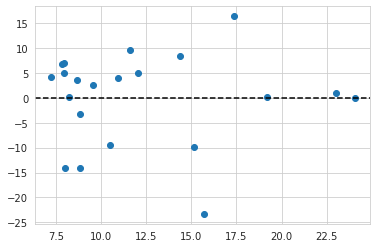

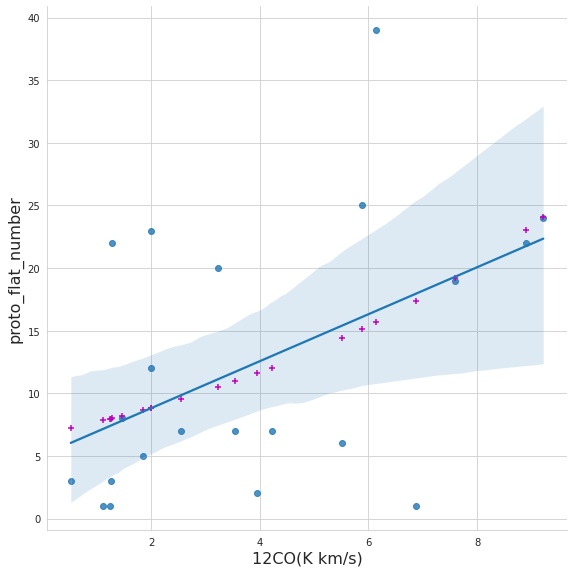

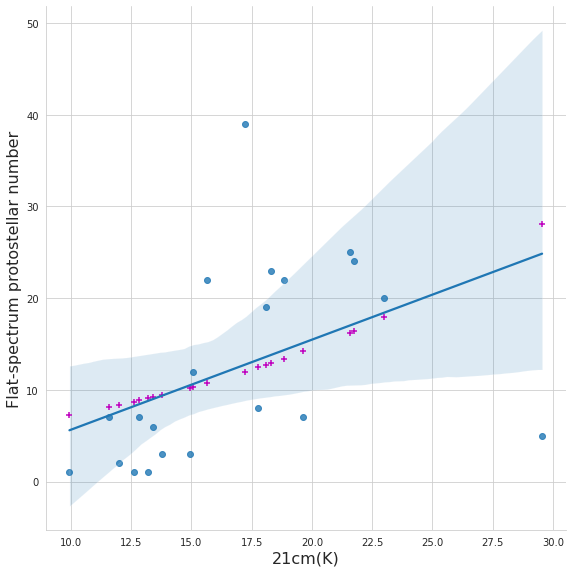

Goodness of fit for CO vs class 1 proto 
 Power_divergenceResult(statistic=134.45711577328115, pvalue=5.656382596604228e-19)


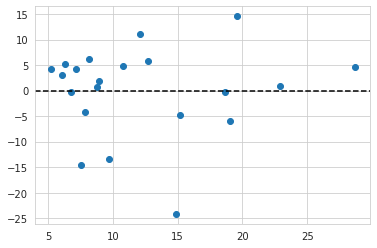

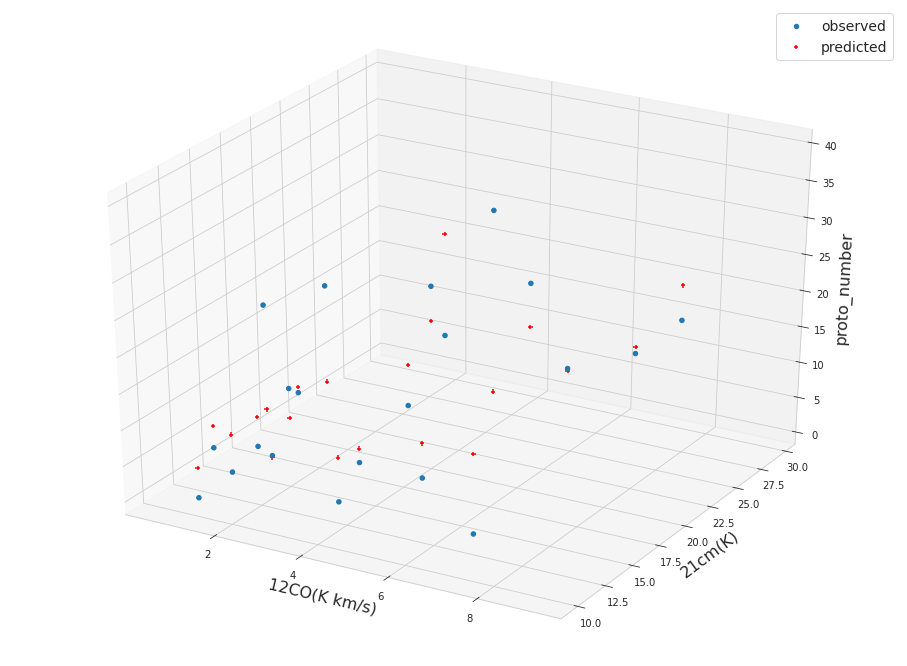

In [ ]:
from sklearn.linear_model import PoissonRegressor
features = ['12CO(K km/s)',	'21cm(K)']
target = ['proto_flat_number']
proto_co = pd.read_csv((filepath + '/data/co+21cm_flat49.csv'))
## >>>>>>>>>>>>>>>>>>>>> 12CO  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
proto_co_df = proto_co.dropna()
proto_co_df= proto_co_df[proto_co_df['proto_flat_number'] > 0]
proto_co_df= proto_co_df[proto_co_df['proto_flat_number'] < proto_co_df['proto_flat_number'].max()]
X = proto_co_df['12CO(K km/s)']
#X = outflow_df[features]
y = proto_co_df[target]
pr = PoissonRegressor() # instantiating the regressor class 
pr.fit(np.array(X).flatten().reshape(-1,1),  np.array(y).flatten())

y_pred = pr.predict(np.array(X).flatten().reshape(-1,1))
res = y_pred - np.array(y).flatten()
#perform Chi-Square Goodness of Fit Test
print('Goodness of fit for CO vs flat-spectrum protostar number','\n',stats.chisquare(np.array(y).flatten(), y_pred))
plt.scatter(y_pred, res.reshape(-1,1))
plt.axhline(y=0, linestyle='--', color='k')
plt.show()
plt.close()

x = np.linspace(proto_co_df[['12CO(K km/s)']].min(), proto_co_df[['12CO(K km/s)']].max(), 10000)
y_pred_curve = pr.predict(x)
sns.lmplot(data=proto_co_df, x='12CO(K km/s)', y='proto_flat_number', hue=None,height=8, ci=95)

plt.scatter(X,y_pred,color='m',marker='+',label='fitted')
plt.xlabel("12CO(K km/s)", fontsize = 16)
plt.ylabel("proto_flat_number", fontsize = 16)
plt.show()
plt.close()

# >>>>>>>>>>>>>>>>>>>>>>>>> 21cm >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
proto_co_df= proto_co_df[proto_co_df['proto_flat_number'] > 0]
X = proto_co_df['21cm(K)']
#X = outflow_df[features]
y = proto_co_df[target]
pr = PoissonRegressor() # instantiating the regressor class 
pr.fit(np.array(X).flatten().reshape(-1,1),  np.array(y).flatten())
y_pred = pr.predict(np.array(X).flatten().reshape(-1,1))

x = np.linspace(proto_co_df[['21cm(K)']].min(), proto_co_df[['21cm(K)']].max(), 10000)
y_pred_curve = pr.predict(x)
sns.lmplot(data=proto_co_df, x='21cm(K)', y='proto_flat_number', hue=None,height=8, ci=95)

plt.scatter(X,y_pred,color='m',marker='+',label='fitted')
plt.xlabel("21cm(K)", fontsize = 16)
plt.ylabel("Flat-spectrum protostellar number", fontsize = 16)
plt.show()
plt.close()

# >>>>>>>>>>>>>>>>>>>>>   USE both 21cm and 12CO >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
X = proto_co_df[features]
y = proto_co_df[target]
pr = PoissonRegressor() # instantiating the regressor class 

pr.fit(X,  np.array(y).flatten())

y_pred = pr.predict(X)
res = y_pred - np.array(y).flatten()
#perform Chi-Square Goodness of Fit Test
print('Goodness of fit for CO vs class 1 proto','\n',stats.chisquare(np.array(y).flatten(), y_pred))
plt.scatter(y_pred, res.reshape(-1,1))
plt.axhline(y=0, linestyle='--', color='k')
plt.show()
plt.close()

x1 = np.array(proto_co_df[features[0]])
x2 = np.array(proto_co_df[features[1]])

#####################################################################
from matplotlib import cm
X1 = np.array(proto_co_df[features[0]])
X2 = np.array(proto_co_df[features[1]])
y = np.array(proto_co_df[target])

fig = plt.figure(figsize=(16,12))
## We'll add a 3d subplot object
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, cmap=cm.hot, alpha=1, label='observed')
ax.scatter(X1, X2, y_pred, color='r', marker='+',alpha=1, label='predicted')
## Add labels
ax.set_xlabel("12CO(K km/s)", fontsize=16)
ax.set_ylabel("21cm(K)", fontsize=16)
ax.set_zlabel("proto_number", fontsize=16)

plt.legend(fontsize=14)
#plt.savefig(filepath + '/output/co_21cm_of.pdf')
plt.show()
plt.close()
